<a href="https://colab.research.google.com/github/Starfighter-rohit/Omdena-Tuberculosis-analysis/blob/main/Model_block_1a_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression Model Building for block 1a 2019 to 2023

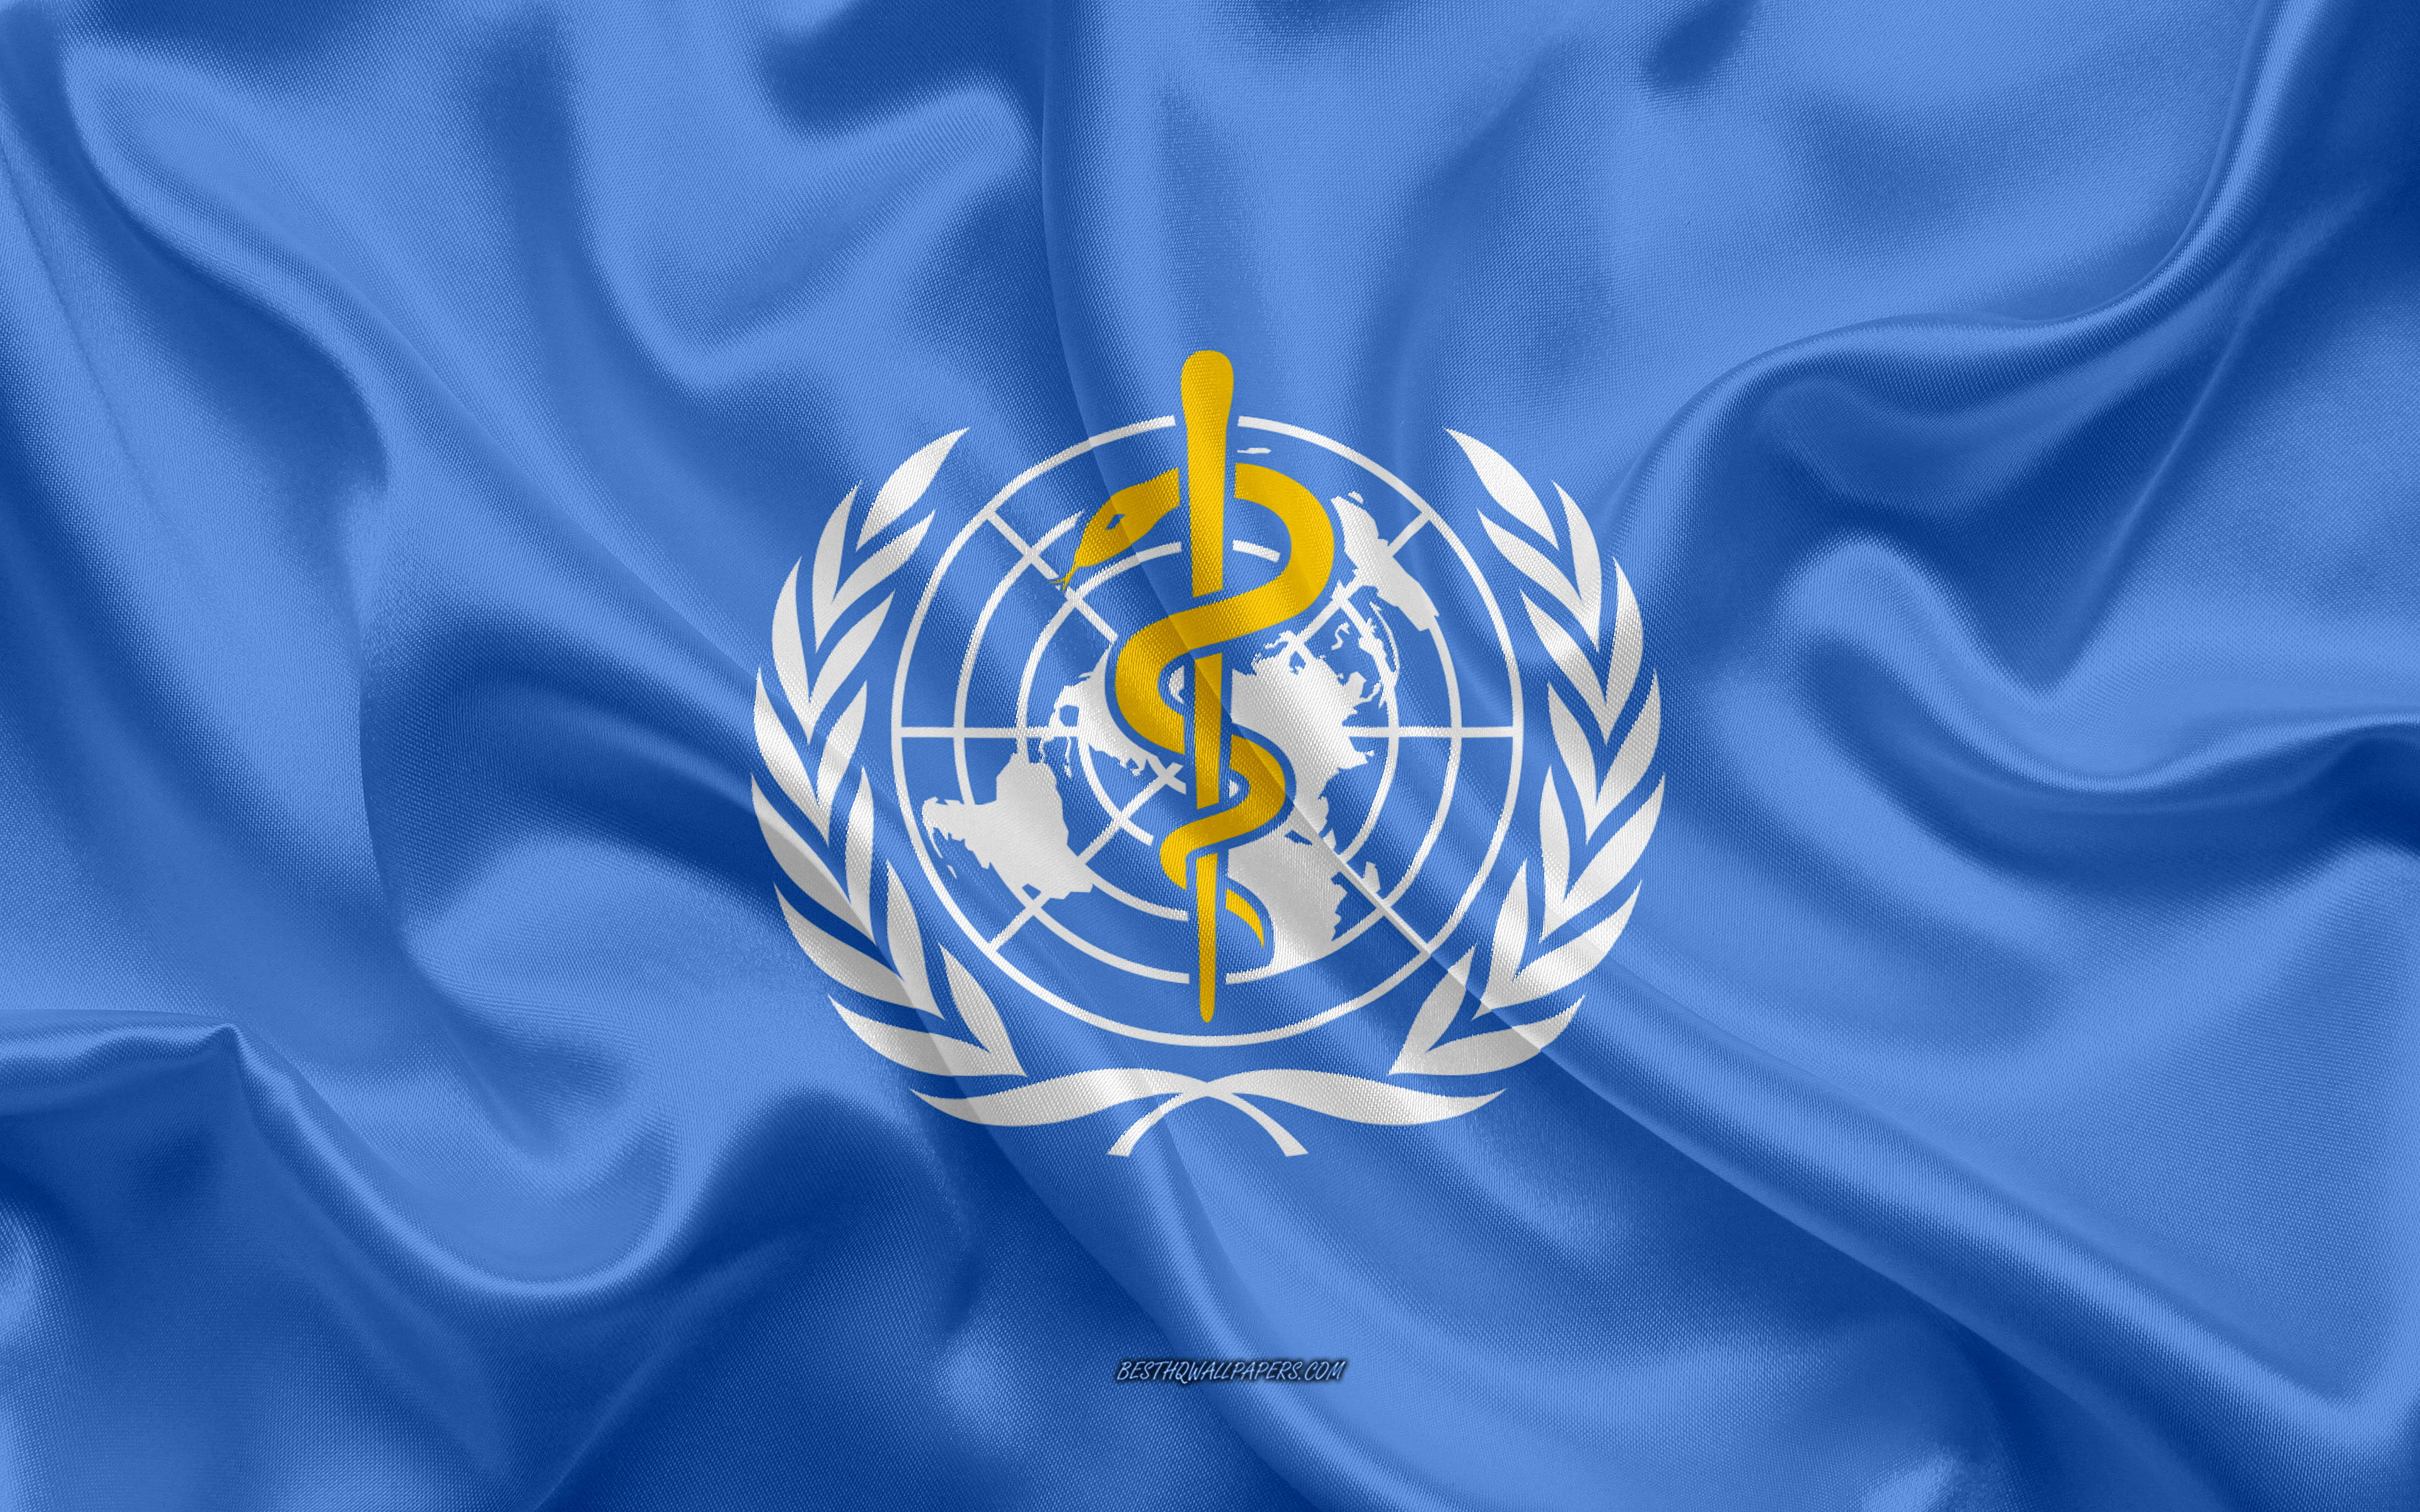

* author - Rohit Saswadkar
* Linkedin - https://linkedin.com/in/rohit-saswadkar-595453237
* Github - https://github.com/Starfighter-rohit?tab=repositories

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Load Data

In [ ]:
# import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load the data
path = '/content/drive/MyDrive/Omdena/My Contribution/Processed Data/block1a_processed.csv'
df = pd.read_csv(path)

In [ ]:
df.shape

(460, 15)

Let explore the data

In [ ]:
df.describe()

Unnamed: 0         Year     Quarter  Total number of presumptives  \
count  460.000000   460.000000  460.000000                    460.000000   
mean   229.500000  2021.000000    2.500000                   1419.571739   
std    132.934821     1.415753    1.119251                   1825.665223   
min      0.000000  2019.000000    1.000000                      0.000000   
25%    114.750000  2020.000000    1.750000                    241.500000   
50%    229.500000  2021.000000    2.500000                    680.000000   
75%    344.250000  2022.000000    3.250000                   1719.750000   
max    459.000000  2023.000000    4.000000                  11513.000000   

       Presumptive DS-TB  Presumptive DR-TB  Examined for diagnosis  \
count         460.000000         460.000000              460.000000   
mean         1397.563043          22.008696             1410.784783   
std          1805.683310          77.104207             1815.147488   
min             0.000000           0.000000                0.000000   
25%           227.000000           0.000000              241.500000   
50%           671.000000           3.000000              675.500000   
75%          1687.000000          20.000000             1710.500000   
max         11349.000000        1198.000000            11513.000000   

       Total diagnosed  Rifampicin resistant  HIV positive  HIV negative  \
count       460.000000            460.000000    460.000000    460.000000   
mean        123.367391              0.573913     15.010870   1086.545652   
std         171.308656              1.445063     34.893393   1610.477967   
min           0.000000              0.000000      0.000000      0.000000   
25%          21.750000              0.000000      0.000000    107.250000   
50%          52.000000              0.000000      2.500000    376.000000   
75%         148.000000              0.000000     12.000000   1257.500000   
max        1022.000000             11.000000    309.000000   8346.000000   

       HIV unknown  Presumptives that are HCWs  
count   460.000000                  460.000000  
mean    318.015217                    0.602174  
std     980.175453                    8.132910  
min       0.000000                    0.000000  
25%       0.000000                    0.000000  
50%       0.000000                    0.000000  
75%     131.250000                    0.000000  
max    9373.000000                  169.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Unnamed: 0                    460 non-null    int64 
 1   Year                          460 non-null    int64 
 2   Quarter                       460 non-null    int64 
 3   LGA                           460 non-null    object
 4   Total number of presumptives  460 non-null    int64 
 5   Presumptive DS-TB             460 non-null    int64 
 6   Presumptive DR-TB             460 non-null    int64 
 7   Examined for diagnosis        460 non-null    int64 
 8   Total diagnosed               460 non-null    int64 
 9   Rifampicin resistant          460 non-null    int64 
 10  HIV positive                  460 non-null    int64 
 11  HIV negative                  460 non-null    int64 
 12  HIV unknown                   460 non-null    int64 
 13  Presumptives that ar

Presumptive DR TB has object vaue as True then replace with 1

In [ ]:
def uniques():
  for col in df.columns:
    print(df[col].nunique())
uniques()

460
5
4
23
386
385
81
385
212
11
72
353
140
10
20


In [ ]:
# shows entire data without skipping
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [ ]:
df['Presumptive DR-TB'].value_counts()

0       193
1        20
3        18
5        14
2        13
20       13
7        12
4        10
8        10
10        8
15        6
21        6
6         6
9         6
12        5
25        5
14        5
44        4
16        4
24        4
13        4
22        4
93        4
35        4
51        4
30        3
31        3
40        3
38        3
45        3
18        2
33        2
49        2
42        2
17        2
27        2
60        2
58        2
11        2
67        2
28        2
47        2
23        1
34        1
164       1
127       1
621       1
271       1
94        1
100       1
36        1
217       1
19        1
138       1
184       1
176       1
97        1
1198      1
32        1
246       1
128       1
70        1
111       1
101       1
86        1
26        1
59        1
52        1
105       1
85        1
37        1
80        1
78        1
53        1
43        1
109       1
108       1
349       1
46        1
633       1
55        1
Name: Presumptive DR-TB, dty

In [ ]:
# replace TRUE to 1 all over the df
# convert the numeric string columns to numeric format
df.replace('TRUE' , 1 , inplace = True)
df['Presumptive DR-TB'] = pd.to_numeric(df['Presumptive DR-TB'] , errors = 'coerce')
df['Year_Quarter'] = pd.to_numeric(df['Year_Quarter'] , errors = 'coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    460 non-null    int64  
 1   Year                          460 non-null    int64  
 2   Quarter                       460 non-null    int64  
 3   LGA                           460 non-null    object 
 4   Total number of presumptives  460 non-null    int64  
 5   Presumptive DS-TB             460 non-null    int64  
 6   Presumptive DR-TB             460 non-null    int64  
 7   Examined for diagnosis        460 non-null    int64  
 8   Total diagnosed               460 non-null    int64  
 9   Rifampicin resistant          460 non-null    int64  
 10  HIV positive                  460 non-null    int64  
 11  HIV negative                  460 non-null    int64  
 12  HIV unknown                   460 non-null    int64  
 13  Presu

In [ ]:
# check null counts
df.isnull().sum()

Unnamed: 0                        0
Year                              0
Quarter                           0
LGA                               0
Total number of presumptives      0
Presumptive DS-TB                 0
Presumptive DR-TB                 0
Examined for diagnosis            0
Total diagnosed                   0
Rifampicin resistant              0
HIV positive                      0
HIV negative                      0
HIV unknown                       0
Presumptives that are HCWs        0
Year_Quarter                    460
dtype: int64

In [ ]:
df = df.fillna(0)

In [ ]:
df.isnull().sum()

Unnamed: 0                      0
Year                            0
Quarter                         0
LGA                             0
Total number of presumptives    0
Presumptive DS-TB               0
Presumptive DR-TB               0
Examined for diagnosis          0
Total diagnosed                 0
Rifampicin resistant            0
HIV positive                    0
HIV negative                    0
HIV unknown                     0
Presumptives that are HCWs      0
Year_Quarter                    0
dtype: int64

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
# get uniques of lga
df['LGA'].value_counts()

Birnin-Gwari    20
Kaura           20
Zango-Kataf     20
Soba            20
Sanga           20
Sabon-Gari      20
Markafi         20
Lere            20
Kudan           20
Kubau           20
Kauru           20
Kajuru          20
Chikun          20
Kagarko         20
Kaduna South    20
Kaduna North    20
Kachia          20
Jema'a          20
Jaba            20
Ikara           20
Igabi           20
Giwa            20
Zaria           20
Name: LGA, dtype: int64

In [ ]:
df['Year_Quarter'].value_counts()

0.0    460
Name: Year_Quarter, dtype: int64

In [ ]:
# LGA are in upper and lower case so replace them with upper
df['LGA'] = df['LGA'].str.upper()
df['LGA'].nunique()

23

In [ ]:
df.mean()

<ipython-input-25-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


Year                            2021.000000
Quarter                            2.500000
Total number of presumptives    1419.571739
Presumptive DS-TB               1397.563043
Presumptive DR-TB                 22.008696
Examined for diagnosis          1410.784783
Total diagnosed                  123.367391
Rifampicin resistant               0.573913
HIV positive                      15.010870
HIV negative                    1086.545652
HIV unknown                      318.015217
Presumptives that are HCWs         0.602174
Year_Quarter                       0.000000
dtype: float64

##Get EDA

In [ ]:
num_cols = list(df.select_dtypes(include=['float','int']).columns)
object_cols = list(df.select_dtypes(include='object').columns)
len(num_cols) , len(object_cols)

(13, 1)

In [ ]:
df.columns

Index(['Year', 'Quarter', 'LGA', 'Total number of presumptives',
       'Presumptive DS-TB', 'Presumptive DR-TB', 'Examined for diagnosis',
       'Total diagnosed', 'Rifampicin resistant', 'HIV positive',
       'HIV negative', 'HIV unknown', 'Presumptives that are HCWs',
       'Year_Quarter'],
      dtype='object')

In [ ]:
num_cols

['Year',
 'Quarter',
 'Total number of presumptives',
 'Presumptive DS-TB',
 'Presumptive DR-TB',
 'Examined for diagnosis',
 'Total diagnosed',
 'Rifampicin resistant',
 'HIV positive',
 'HIV negative',
 'HIV unknown',
 'Presumptives that are HCWs',
 'Year_Quarter']

In [ ]:
df['HIV positive'].sum()

6905

In [ ]:
hiv_pos_each_year = df.groupby('Year')['HIV positive'].sum().reset_index()
hiv_pos_each_year

Year  HIV positive
0  2019          1821
1  2020          1352
2  2021          1462
3  2022          1648
4  2023           622

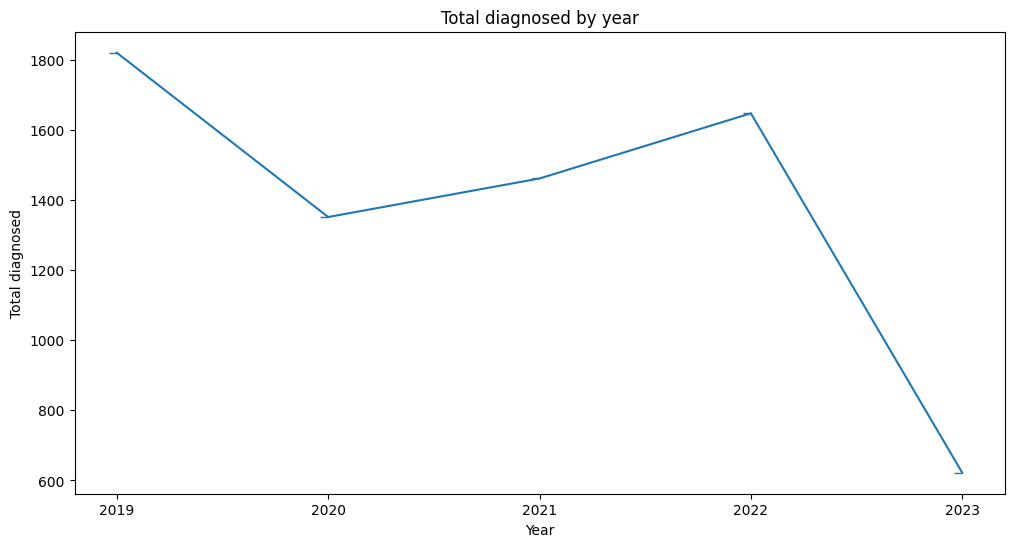

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(hiv_pos_each_year['Year'].astype(str),hiv_pos_each_year['HIV positive'],marker = 0,linestyle='-')
plt.title('Total diagnosed by year')
plt.ylabel('Total diagnosed')
plt.xlabel('Year')
# plt.grid(True)
plt.show()

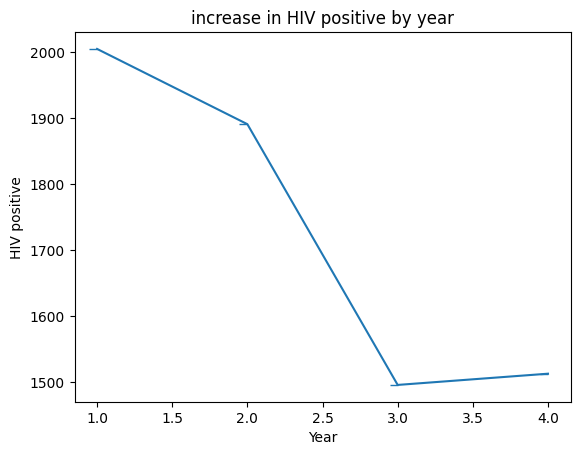

In [ ]:
# for col in num_cols:
grouped = df.groupby('Quarter')['HIV positive'].sum().reset_index()
plt.plot(grouped['Quarter'] , grouped['HIV positive'],marker=0,linestyle='-')
plt.xlabel('Year')
plt.ylabel('HIV positive')
plt.title(f"increase in {'HIV positive'} by year")
plt.show()

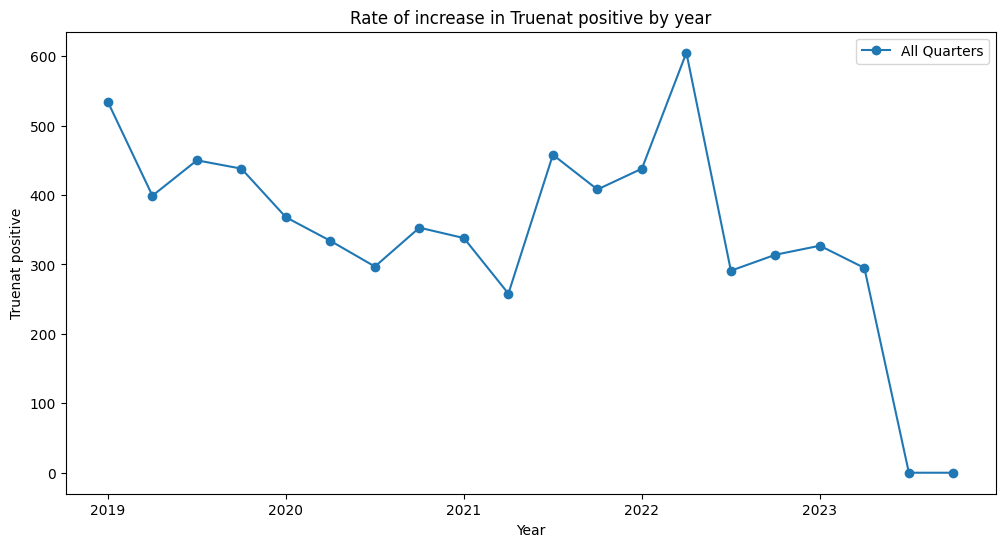

In [ ]:
grouped_data = df.groupby(['Year','Quarter'])['HIV positive'].sum().reset_index()
plt.figure(figsize=(12,6))
plt.plot(grouped_data['Year'] + (grouped_data['Quarter'] - 1) / 4, grouped_data['HIV positive'], marker='o', label='All Quarters')
plt.xticks(grouped_data['Year'].unique())
plt.xlabel('Year')
plt.ylabel('Truenat positive')
plt.title('Rate of increase in Truenat positive by year')
plt.legend()
plt.show()

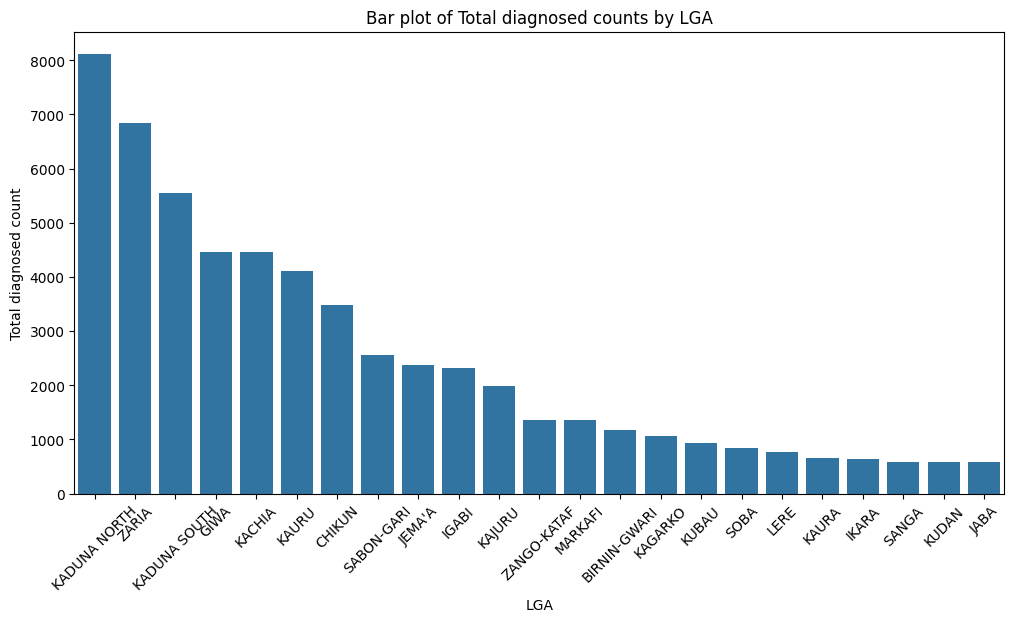

In [ ]:
# bar plot
plt.figure(figsize=(12,6))
sns.barplot(x='LGA',y='Total diagnosed',data=df.groupby('LGA').sum().reset_index().sort_values(by='Total diagnosed',ascending=False))
plt.title('Bar plot of Total diagnosed counts by LGA')
plt.xticks(rotation=45)
plt.xlabel("LGA")
plt.ylabel('Total diagnosed count')
plt.show()


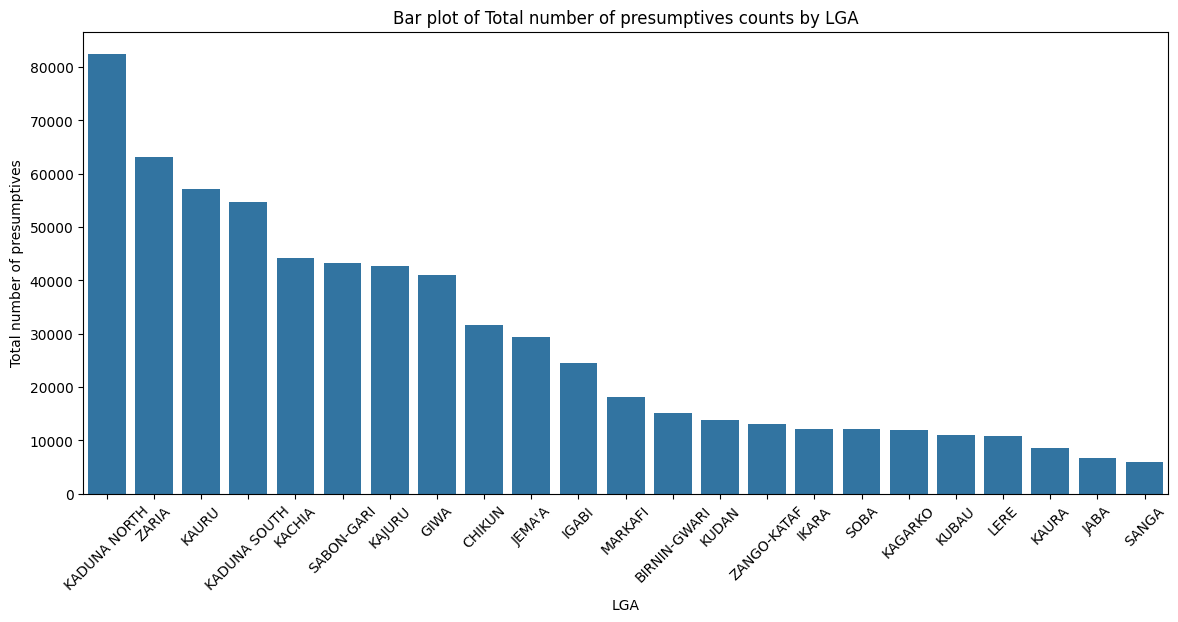

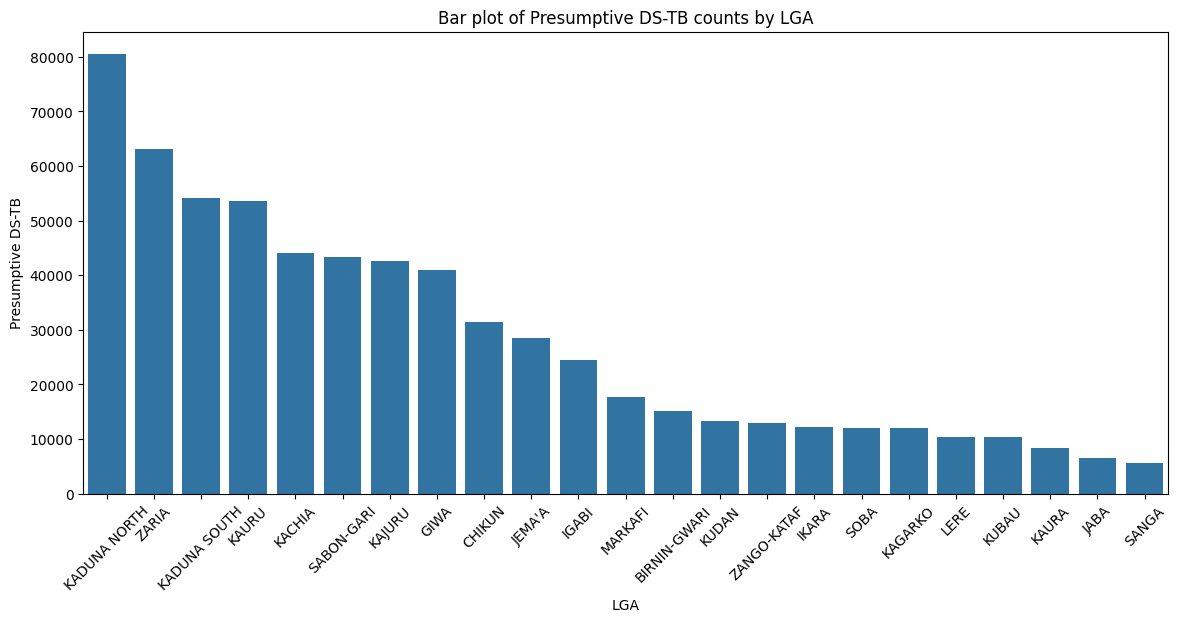

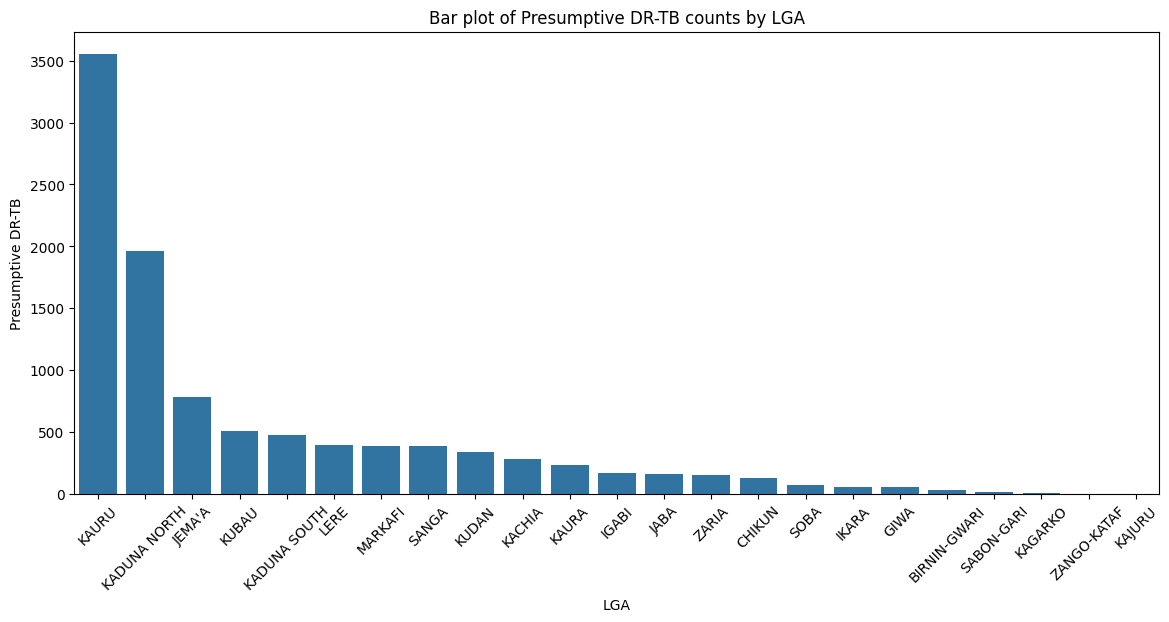

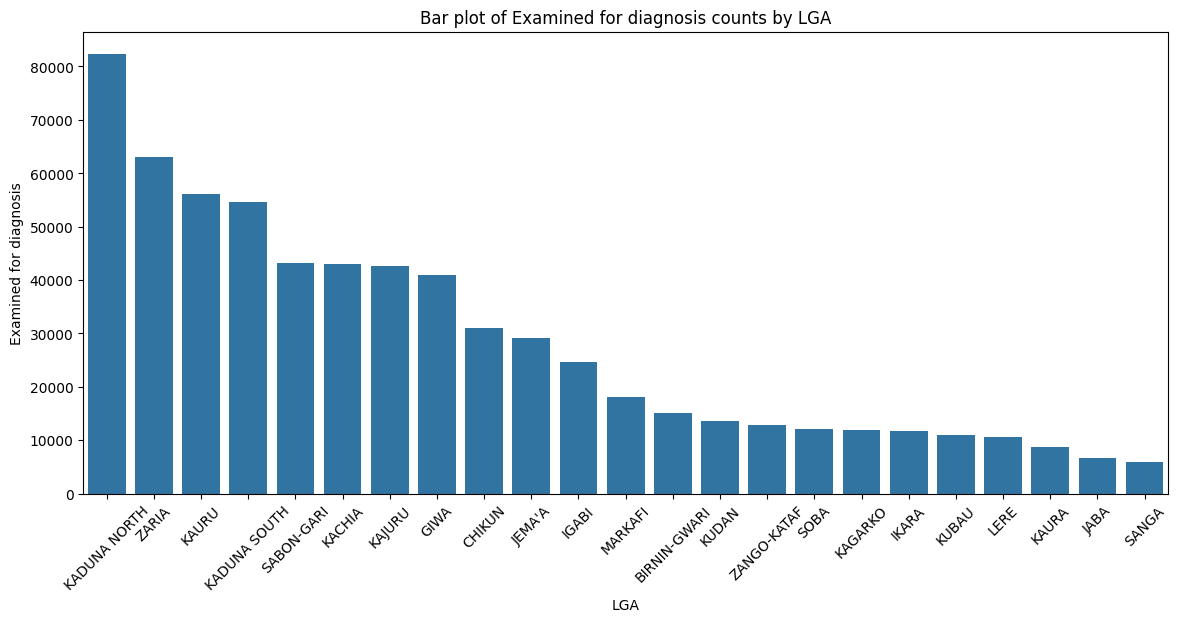

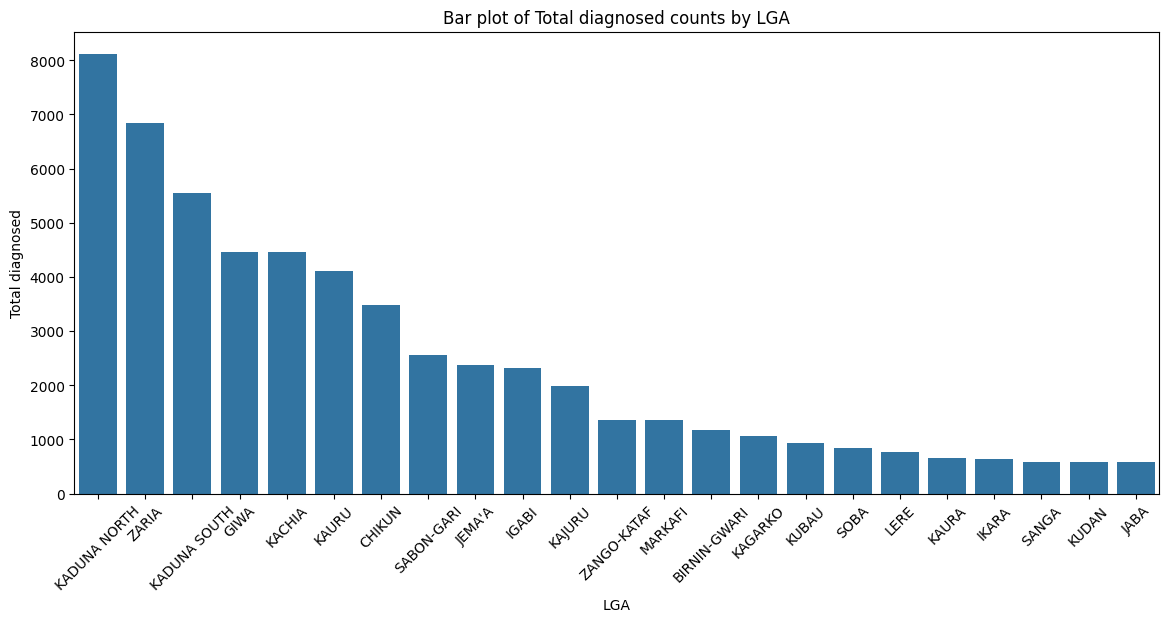

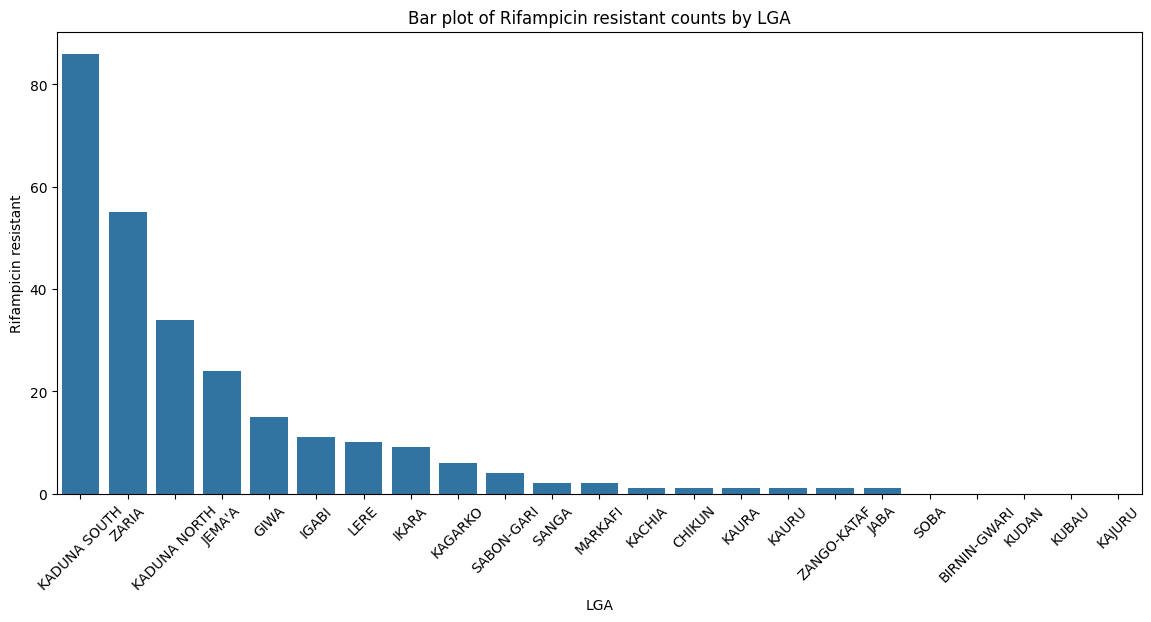

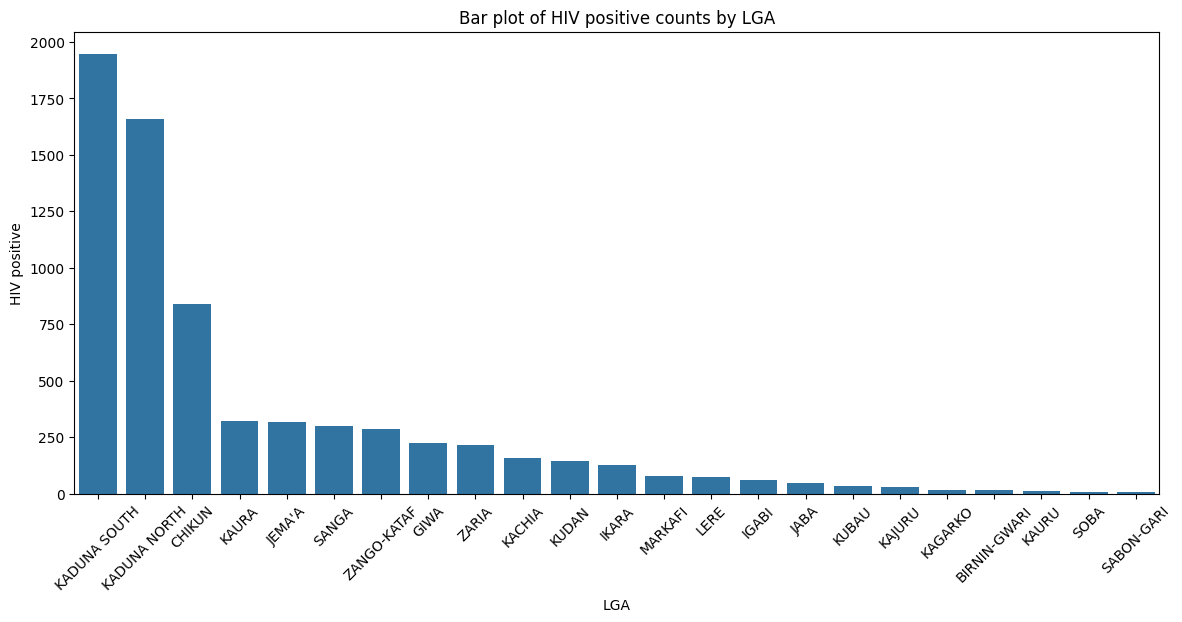

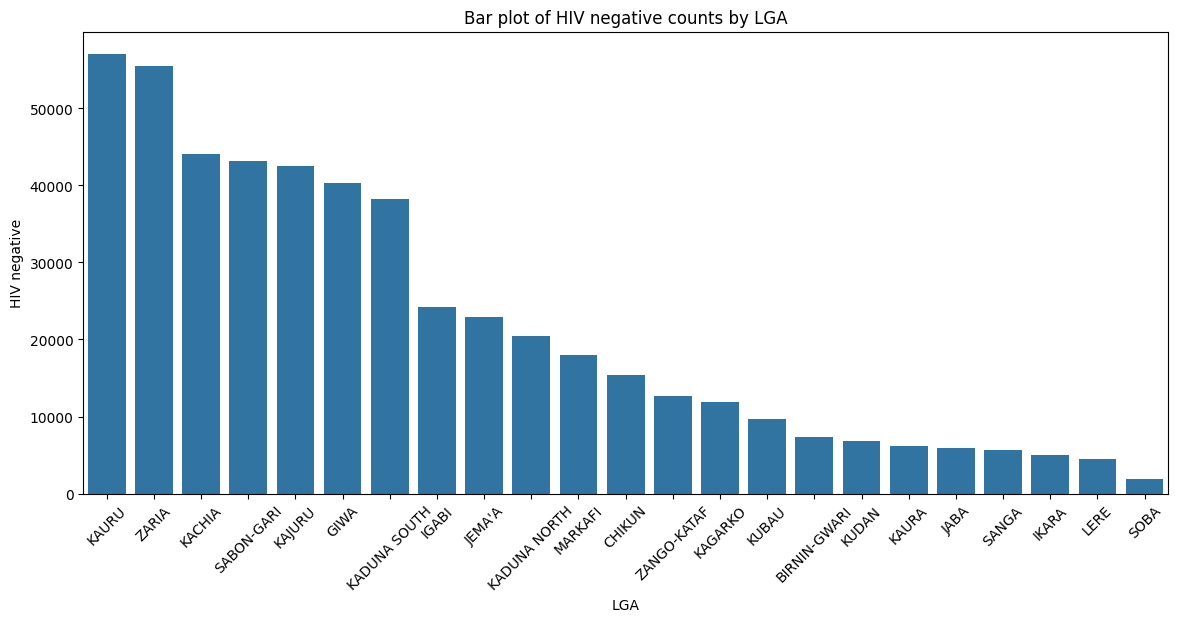

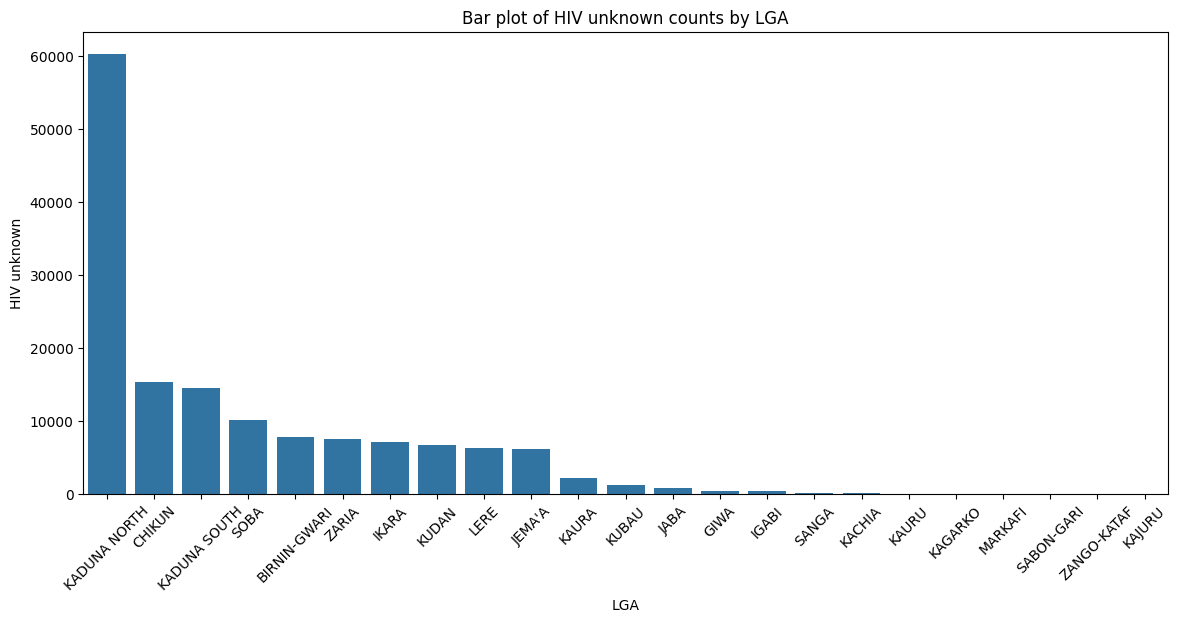

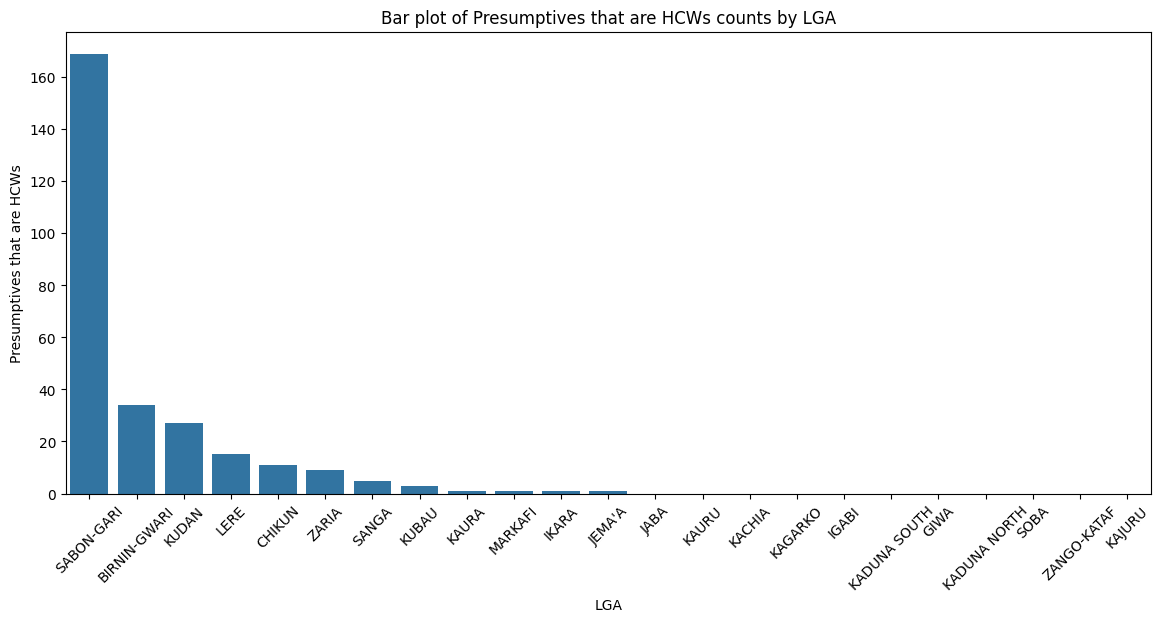

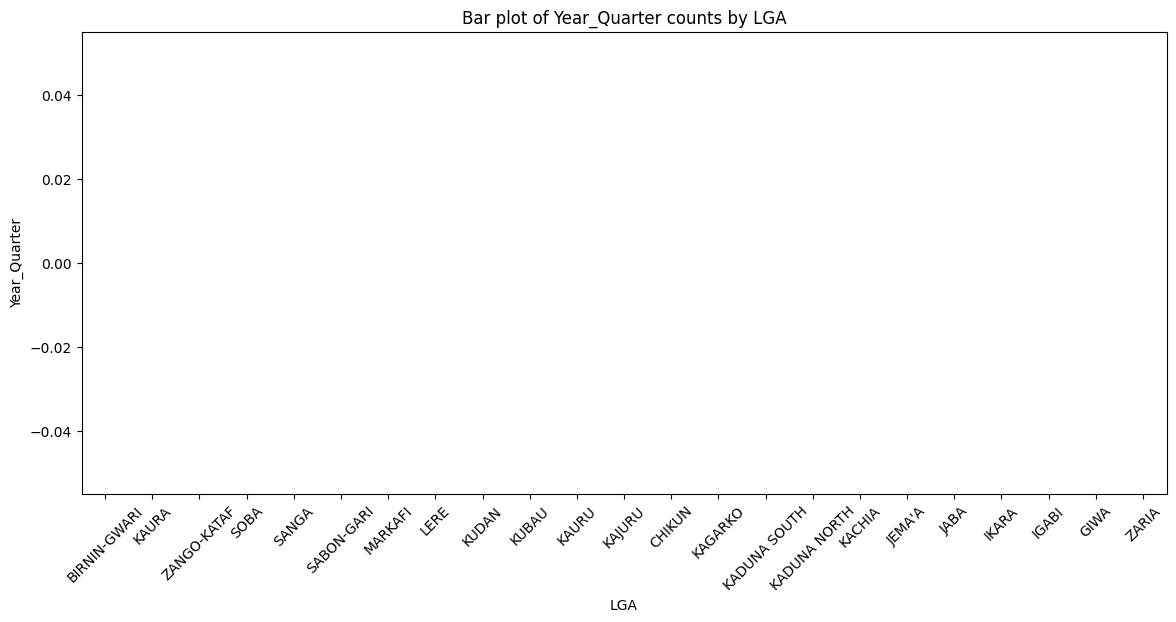

In [ ]:
num_cols = [x for x in num_cols if x not in ['Year','Quarter']]
for col in num_cols:
  plt.figure(figsize=(14,6))
  sns.barplot(x='LGA',y=col,data=df.groupby('LGA').sum().reset_index().sort_values(by=col,ascending=False ))
  plt.title(f'Bar plot of {col} counts by LGA')
  plt.xticks(rotation=45)
  plt.xlabel("LGA")
  plt.ylabel(col)
  plt.show()


In [ ]:
x = df.drop('LGA',axis=1)

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,10

###Check the diagnosis trends in each region

In [ ]:
def bar_plot(col):

  grouped_data = df.groupby(['Year','Quarter'])[col].sum().reset_index()
  plt.figure(figsize=(10,6))
  plt.plot(grouped_data['Year'] + (grouped_data['Quarter'] - 1) / 4, grouped_data[col], marker='o', label='All Quarters')
  plt.xticks(grouped_data['Year'].unique())
  plt.xlabel('Year')
  plt.ylabel(f'{col}')
  plt.title(f'Rate of change in {col} by year')
  plt.legend()
  plt.show()

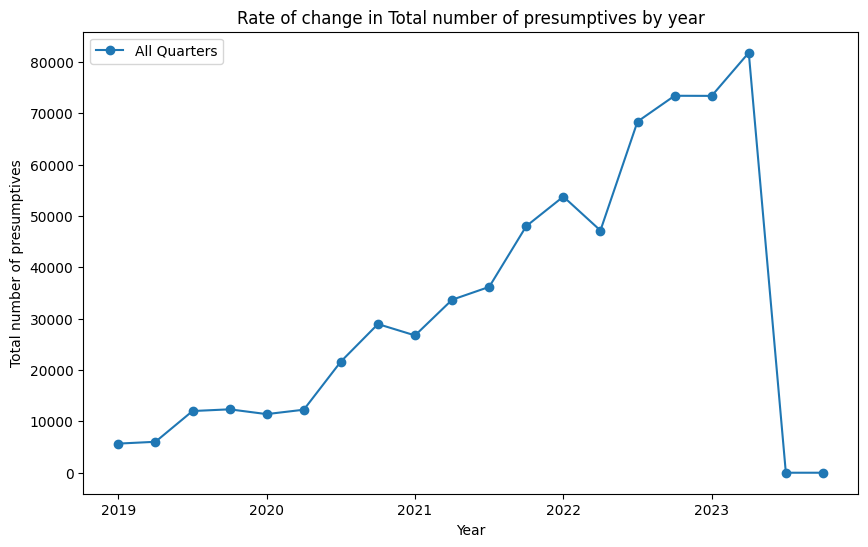

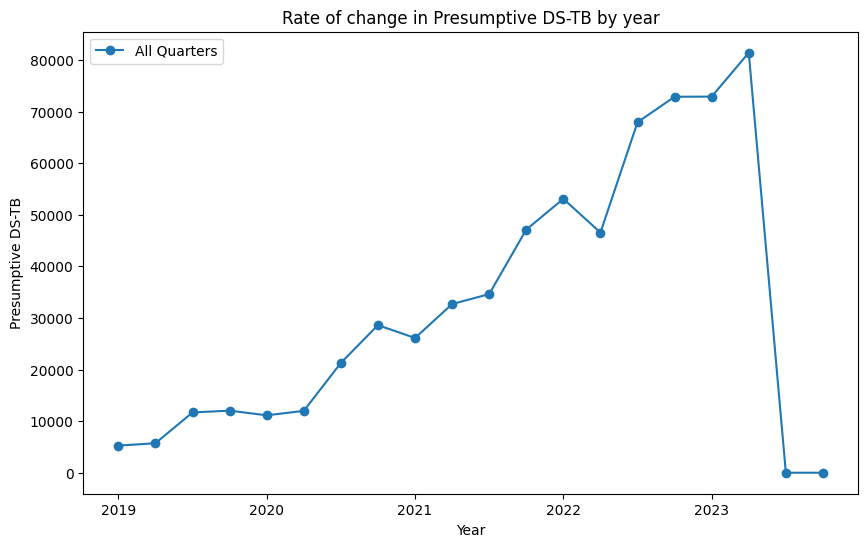

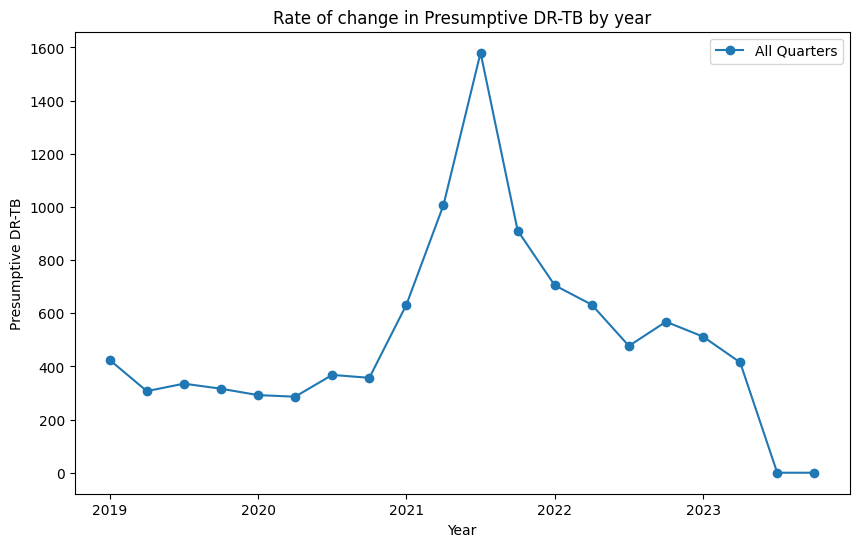

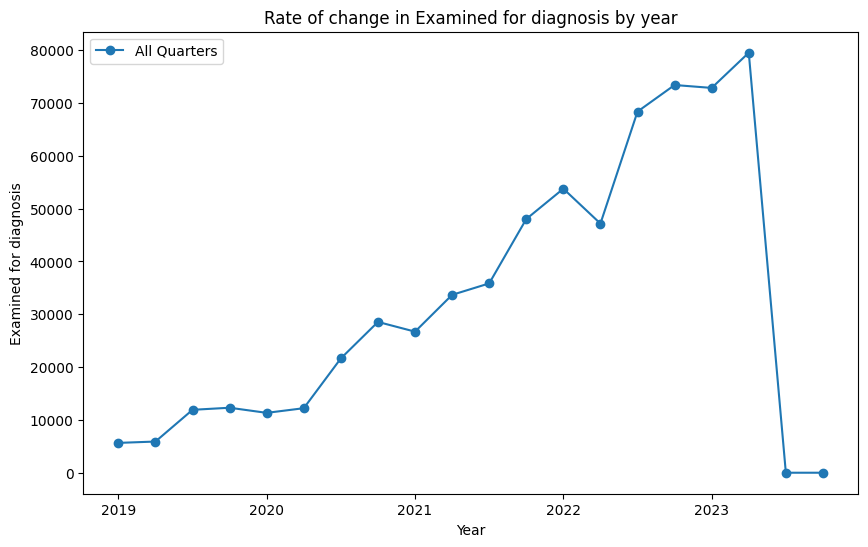

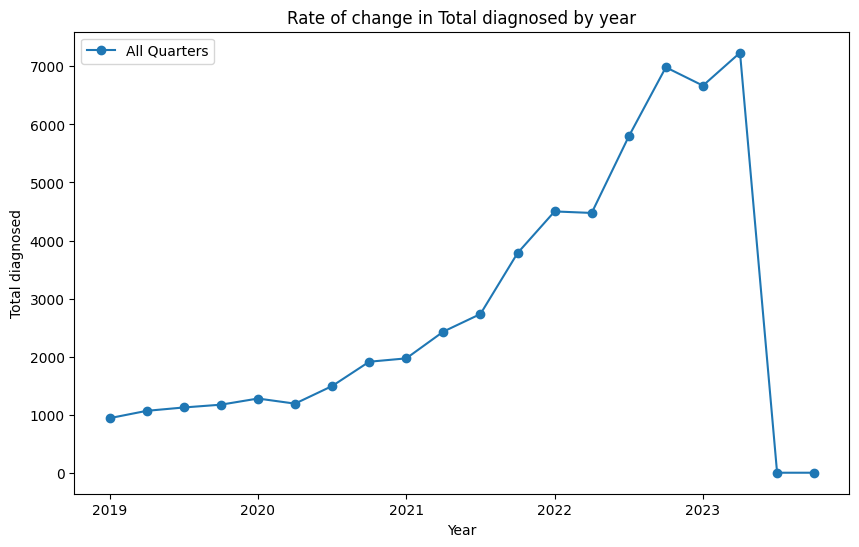

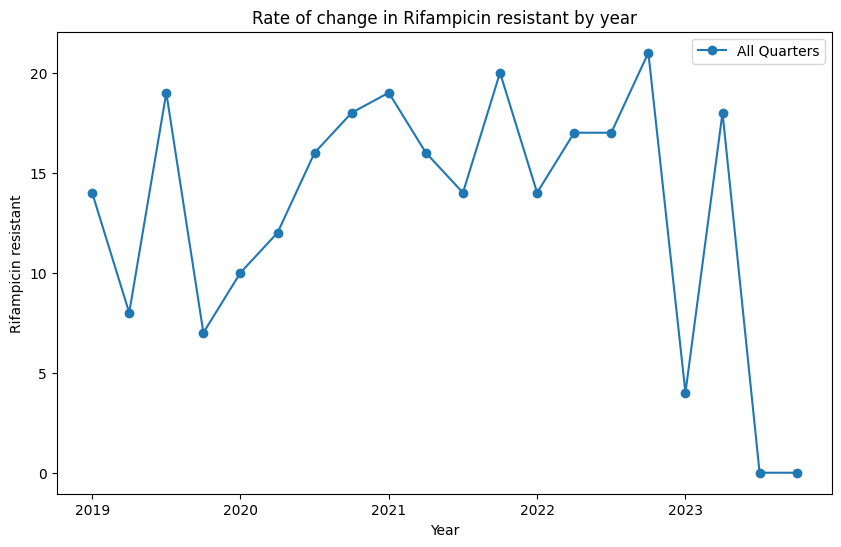

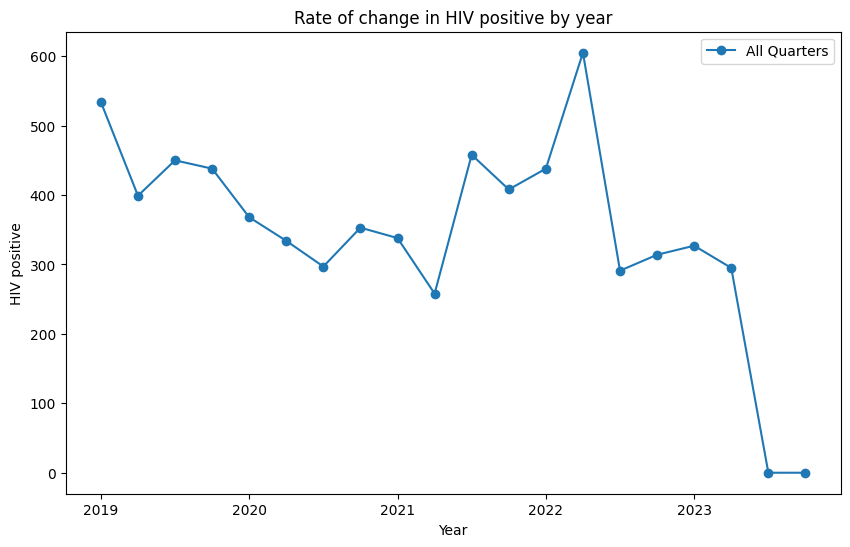

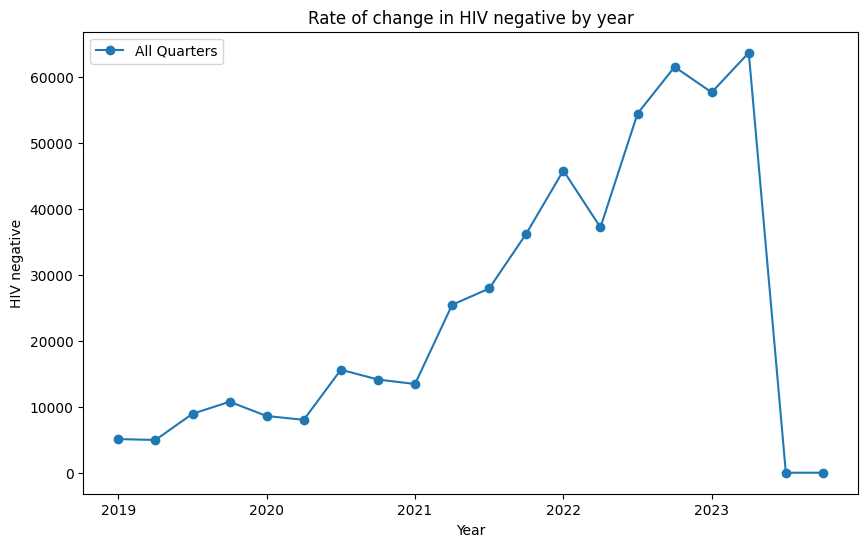

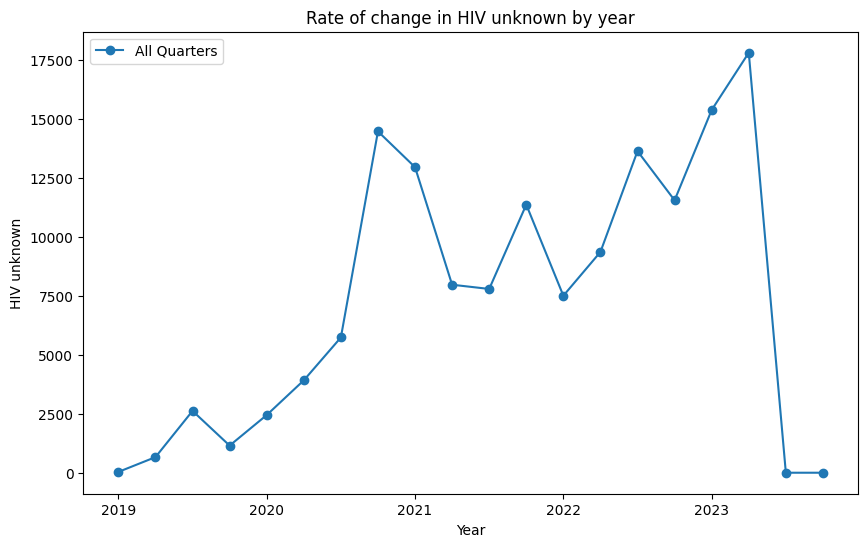

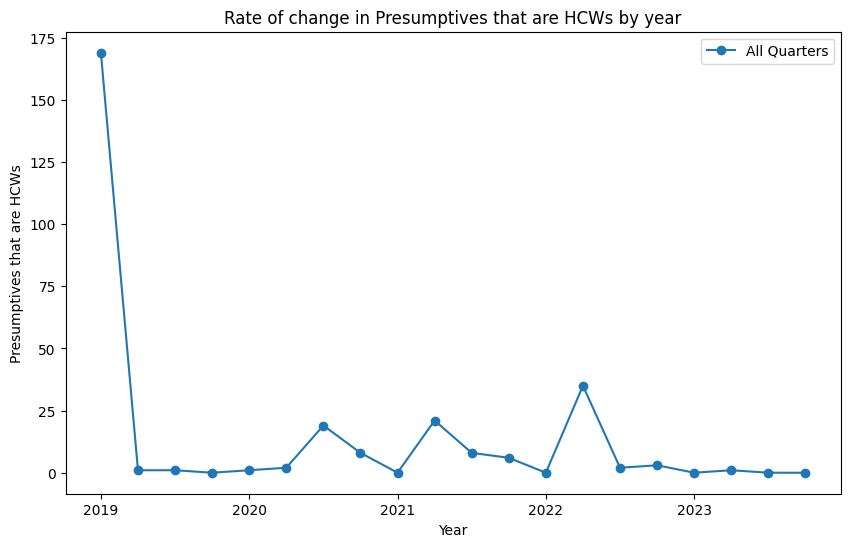

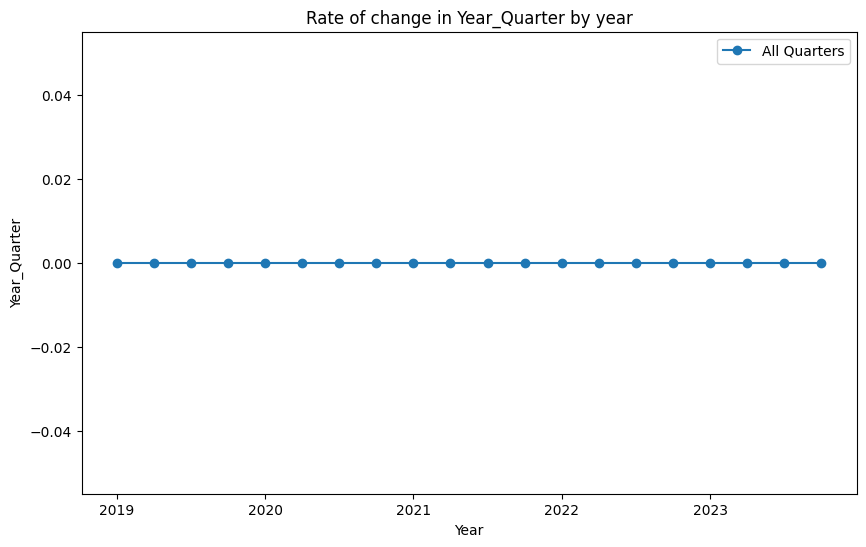

In [ ]:
for col in num_cols:
  bar_plot(col)

In [ ]:
num_cols

['Total number of presumptives',
 'Presumptive DS-TB',
 'Presumptive DR-TB',
 'Examined for diagnosis',
 'Total diagnosed',
 'Rifampicin resistant',
 'HIV positive',
 'HIV negative',
 'HIV unknown',
 'Presumptives that are HCWs',
 'Year_Quarter']

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def line_plot(col):

  grouped_data = df.groupby(['Year','Quarter', 'LGA'])[col].sum().reset_index()

  plt.figure(figsize=(10,6))
  sns.lineplot(x='Year', y=col, hue='LGA', data=grouped_data, marker='o' , ci = False)

  plt.xlabel('Year')
  plt.xticks(df['Year'])
  plt.ylabel(col)
  plt.title(f'Increase in {col} by LGA and Year')
  plt.legend(title='LGA', loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend position
  plt.show()


<ipython-input-41-6acacc51c65a>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x='Year', y=col, hue='LGA', data=grouped_data, marker='o' , ci = False)


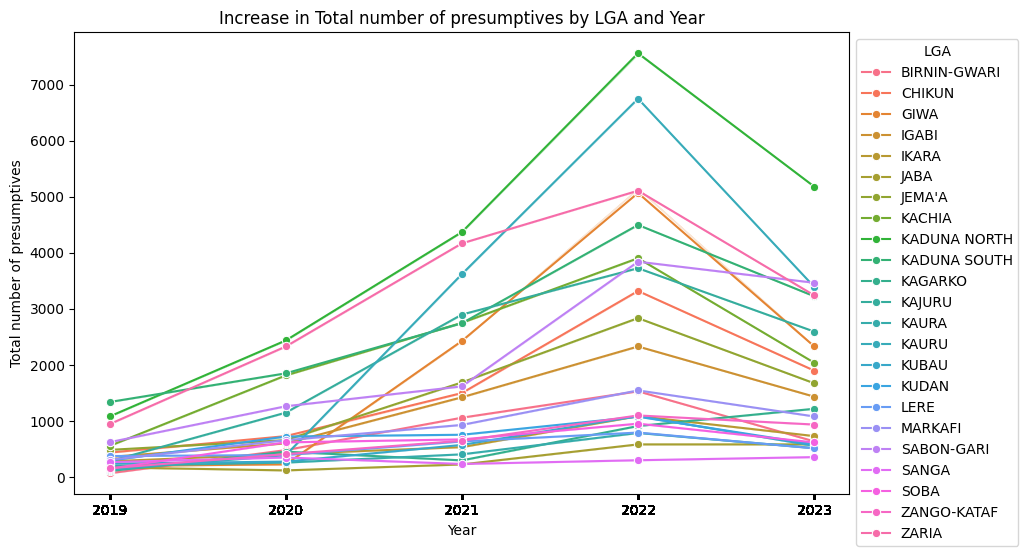

<ipython-input-41-6acacc51c65a>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x='Year', y=col, hue='LGA', data=grouped_data, marker='o' , ci = False)


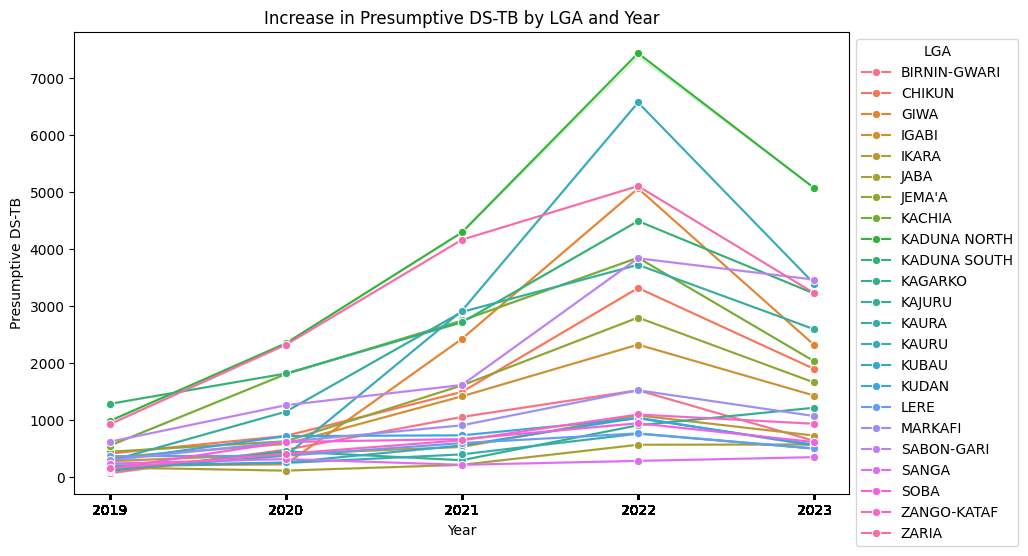

<ipython-input-41-6acacc51c65a>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x='Year', y=col, hue='LGA', data=grouped_data, marker='o' , ci = False)


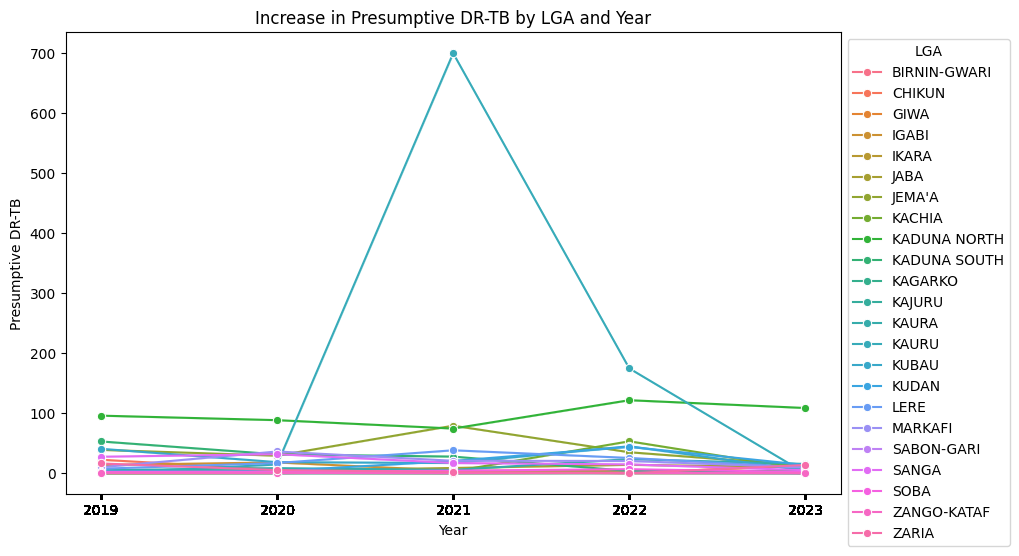

<ipython-input-41-6acacc51c65a>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x='Year', y=col, hue='LGA', data=grouped_data, marker='o' , ci = False)


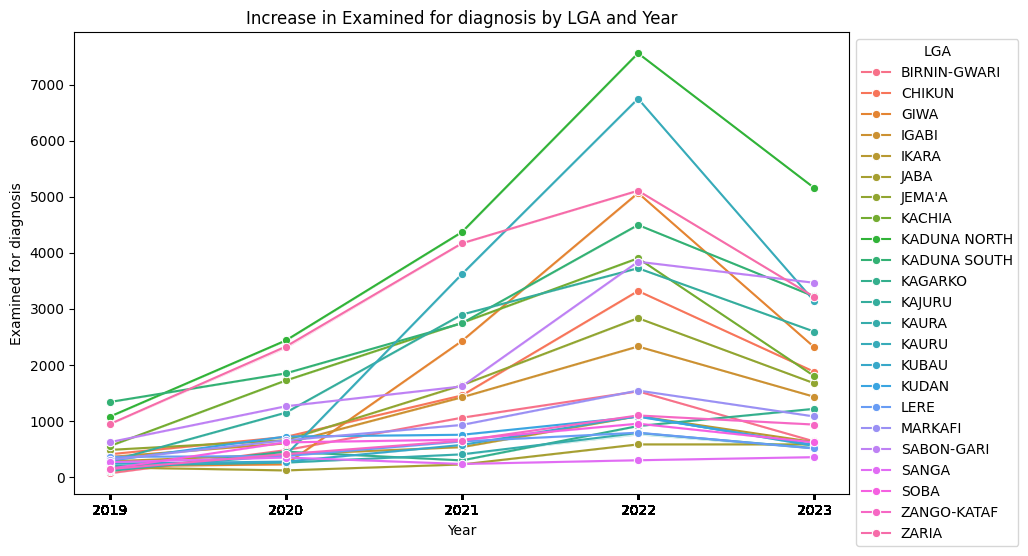

<ipython-input-41-6acacc51c65a>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x='Year', y=col, hue='LGA', data=grouped_data, marker='o' , ci = False)


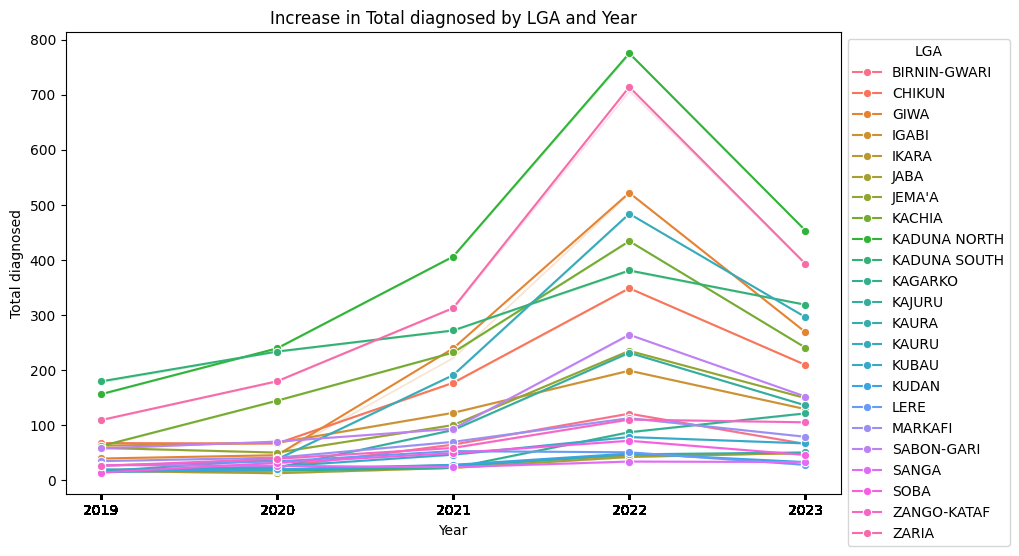

<ipython-input-41-6acacc51c65a>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x='Year', y=col, hue='LGA', data=grouped_data, marker='o' , ci = False)


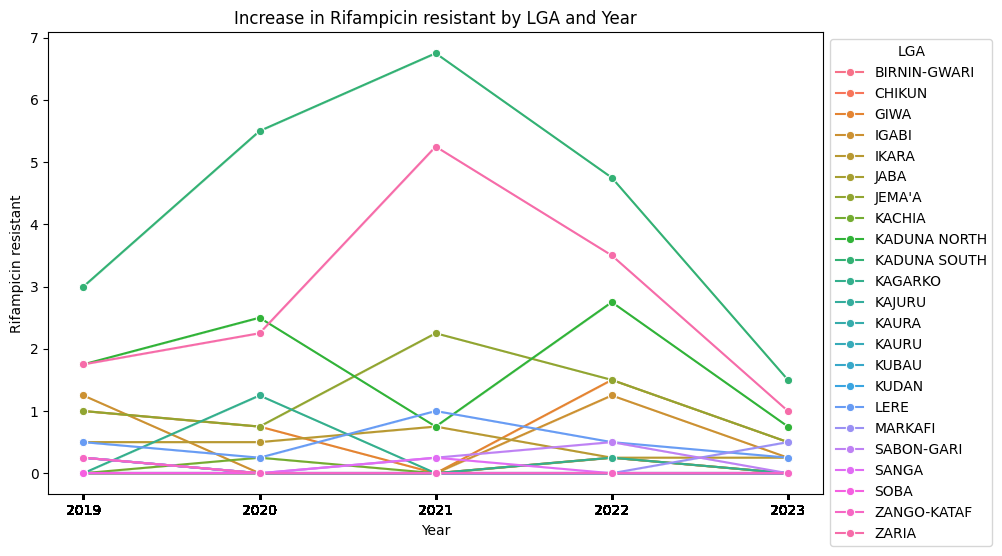

<ipython-input-41-6acacc51c65a>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x='Year', y=col, hue='LGA', data=grouped_data, marker='o' , ci = False)


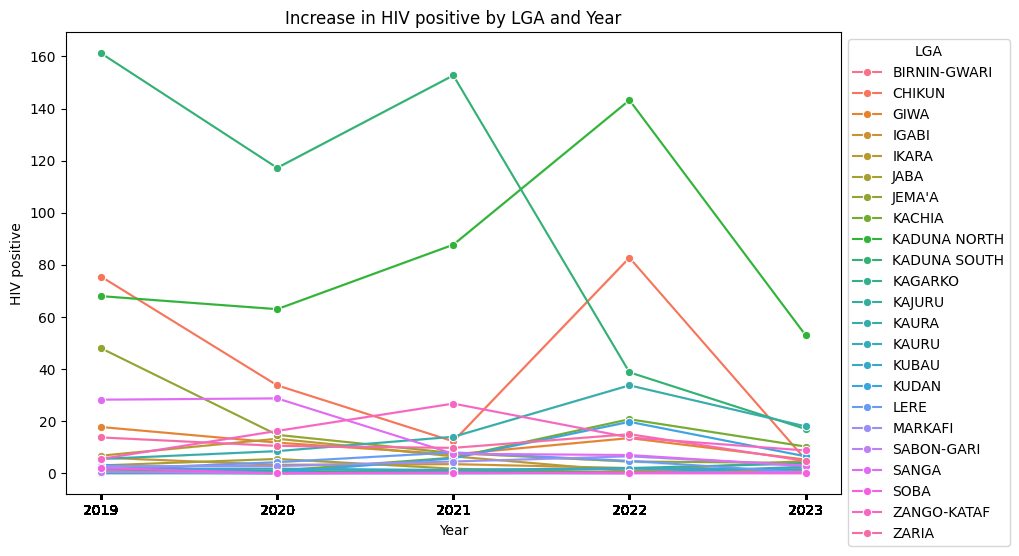

<ipython-input-41-6acacc51c65a>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x='Year', y=col, hue='LGA', data=grouped_data, marker='o' , ci = False)


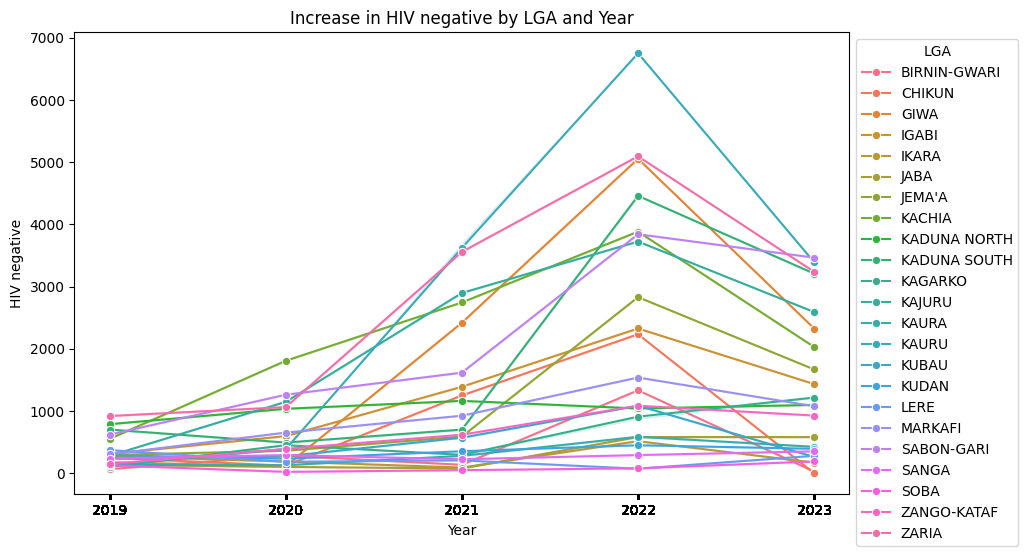

<ipython-input-41-6acacc51c65a>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x='Year', y=col, hue='LGA', data=grouped_data, marker='o' , ci = False)


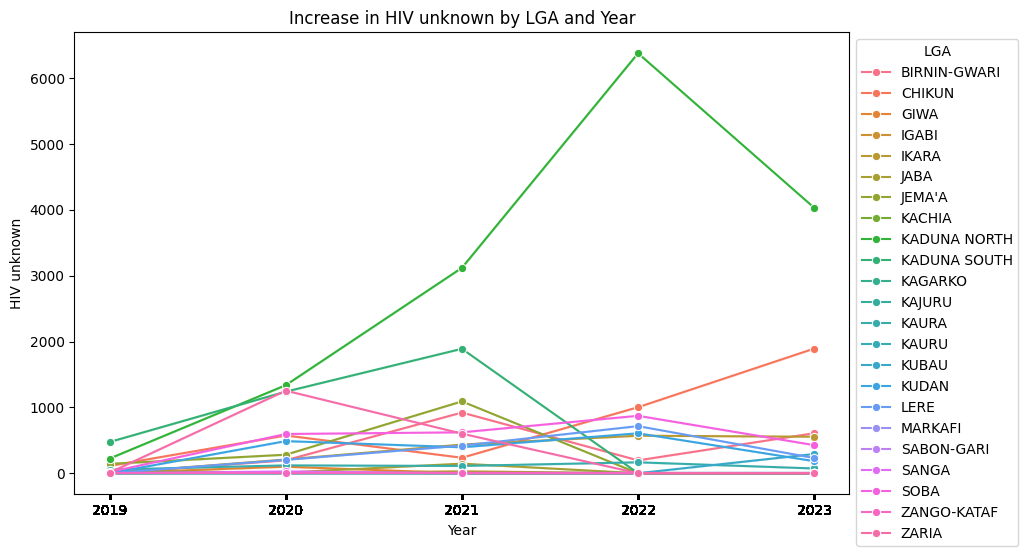

<ipython-input-41-6acacc51c65a>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x='Year', y=col, hue='LGA', data=grouped_data, marker='o' , ci = False)


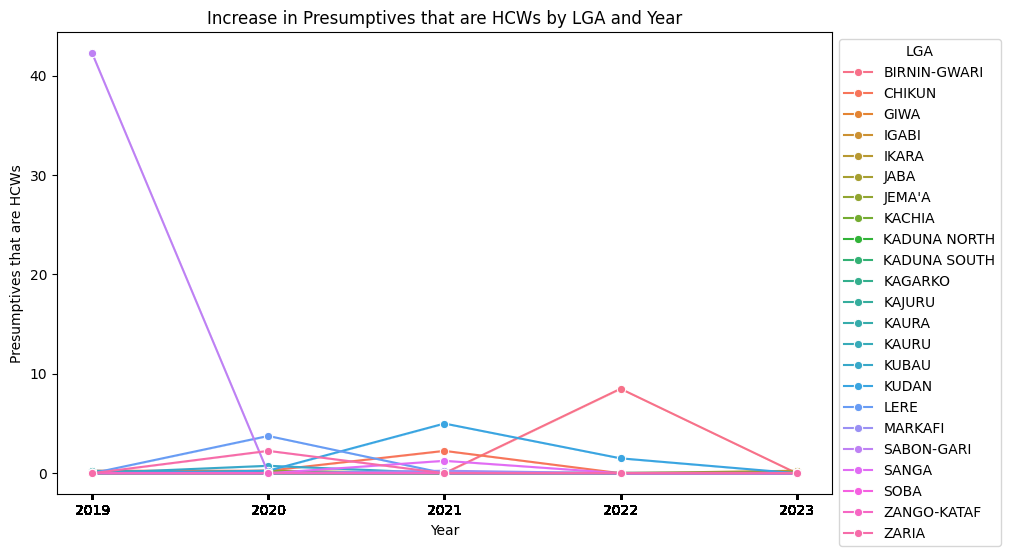

<ipython-input-41-6acacc51c65a>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x='Year', y=col, hue='LGA', data=grouped_data, marker='o' , ci = False)


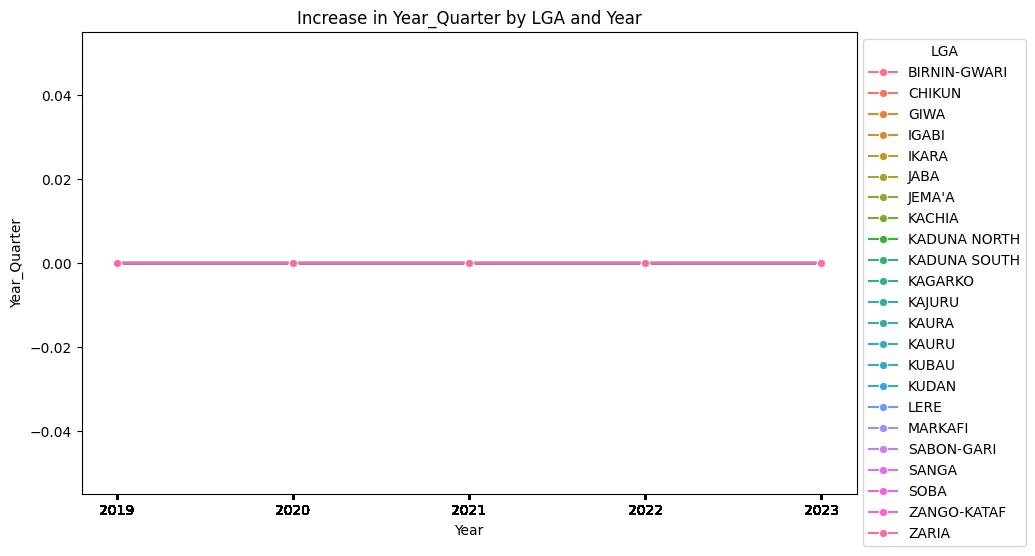

In [ ]:
for col in num_cols:
  line_plot(col)

Year
2019    Axes(0.125,0.11;0.775x0.77)
2020    Axes(0.125,0.11;0.775x0.77)
2021    Axes(0.125,0.11;0.775x0.77)
2022    Axes(0.125,0.11;0.775x0.77)
2023    Axes(0.125,0.11;0.775x0.77)
Name: Total diagnosed, dtype: object

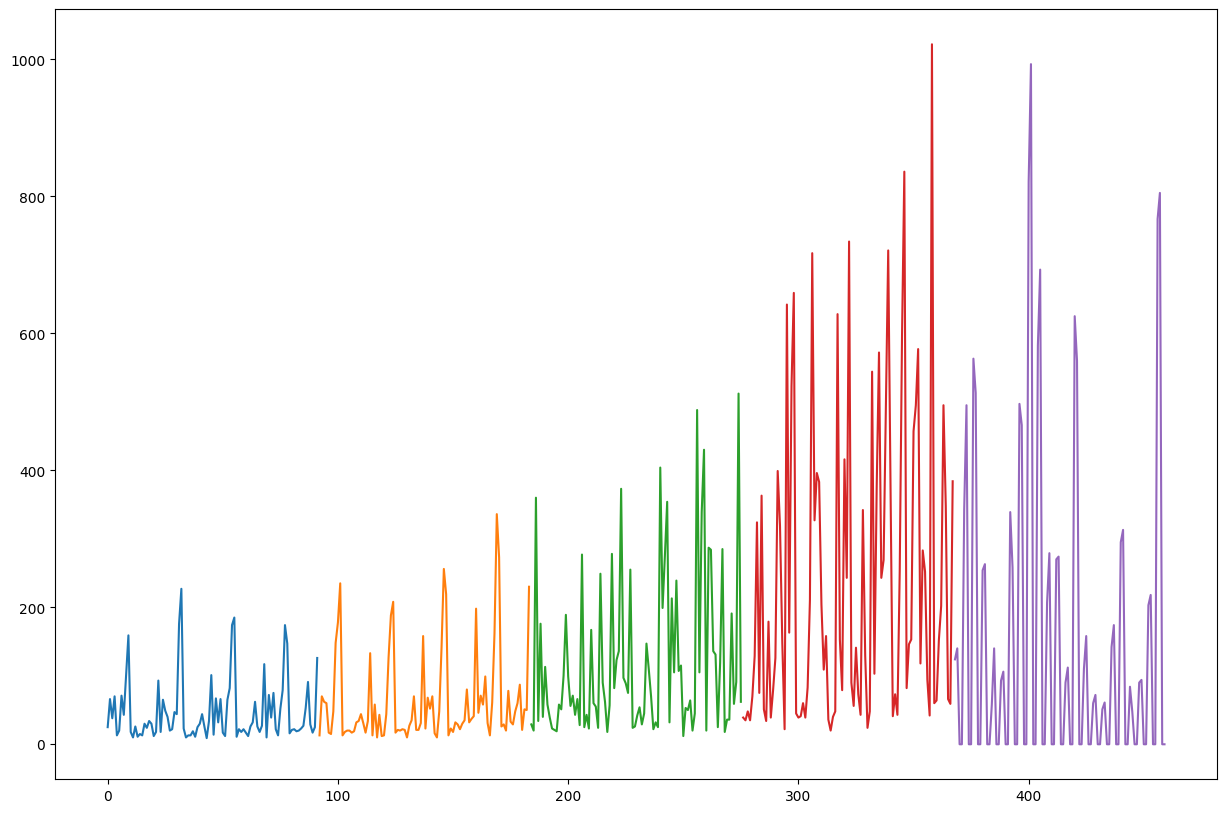

In [ ]:
df.groupby('Year')['Total diagnosed'].plot()

In [ ]:
df.columns

Index(['Year', 'Quarter', 'LGA', 'Total number of presumptives',
       'Presumptive DS-TB', 'Presumptive DR-TB', 'Examined for diagnosis',
       'Total diagnosed', 'Rifampicin resistant', 'HIV positive',
       'HIV negative', 'HIV unknown', 'Presumptives that are HCWs',
       'Year_Quarter'],
      dtype='object')

###Check correlation of each column with Total Diagnosed

In [ ]:
df['Rifampicin resistant'].unique()

array([ 0,  1,  3,  4,  2,  9,  7,  8, 11,  5,  6])

In [ ]:
df['Presumptive DR-TB'].nunique()

81

In [ ]:
# numerical columns corelation to total diagnosed
columns_for_correlation = ['Total number of presumptives',
       'Presumptive DS-TB', 'Presumptive DR-TB', 'Examined for diagnosis',
       'Rifampicin resistant', 'HIV positive',
       'HIV negative', 'HIV unknown', 'Presumptives that are HCWs']

In [ ]:
# scatter plot for corelation
def scatter_plot(col):
  plt.figure(figsize=(10,6))
  sns.scatterplot(x = col , y='Total diagnosed' , data = df)
  plt.xlabel(col)
  plt.ylabel('Total diagnosed')
  plt.title(f'Correlation of {col} with Total diagnosed')
  plt.show()

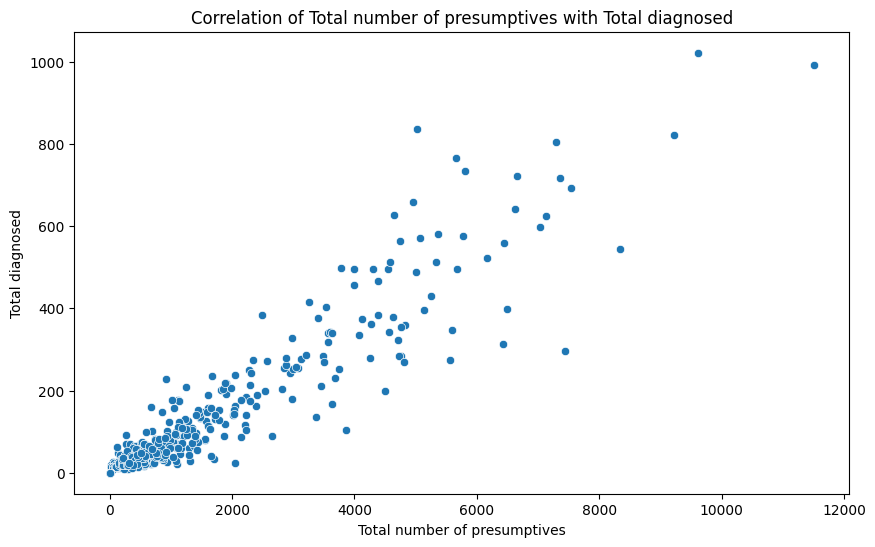

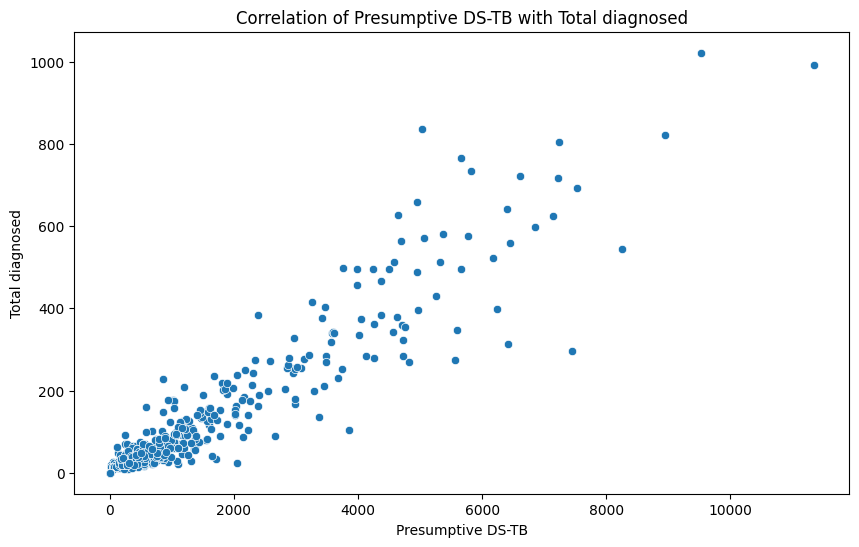

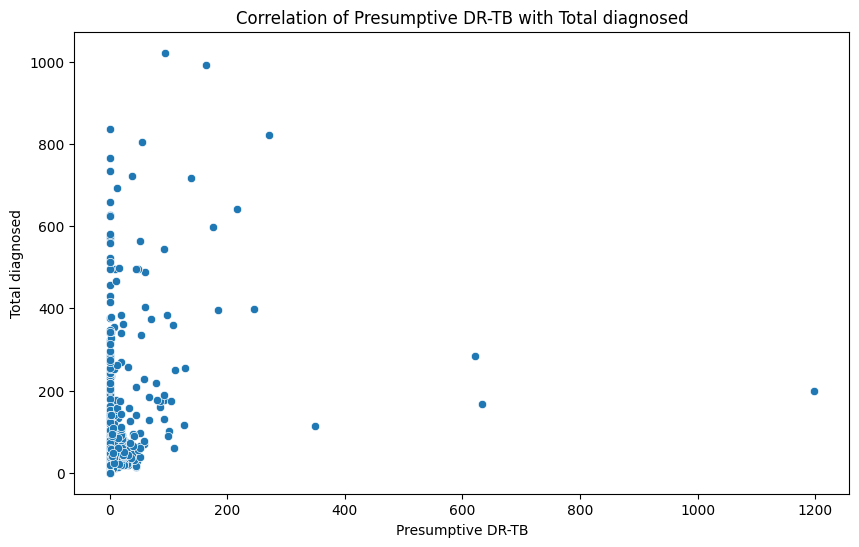

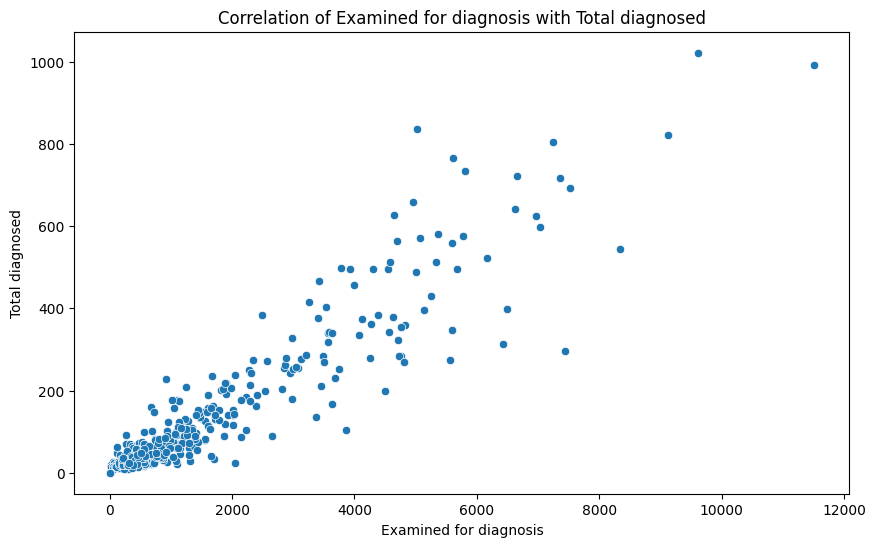

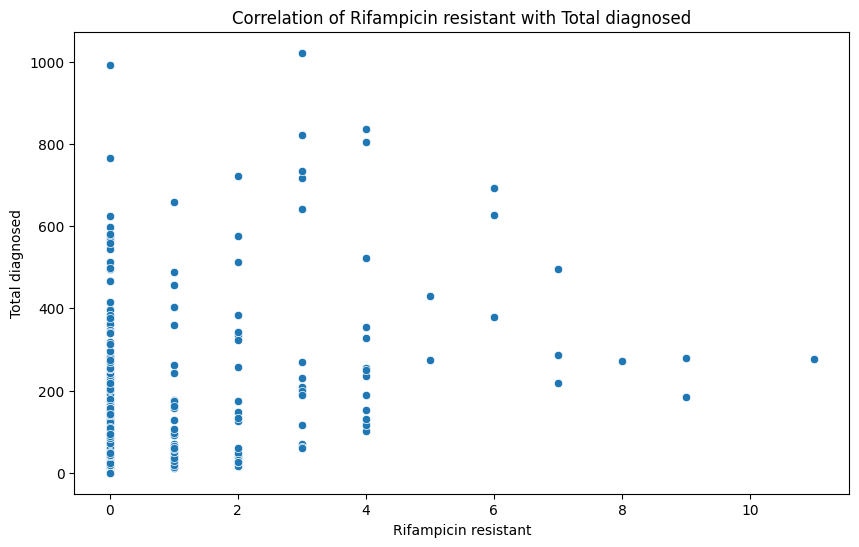

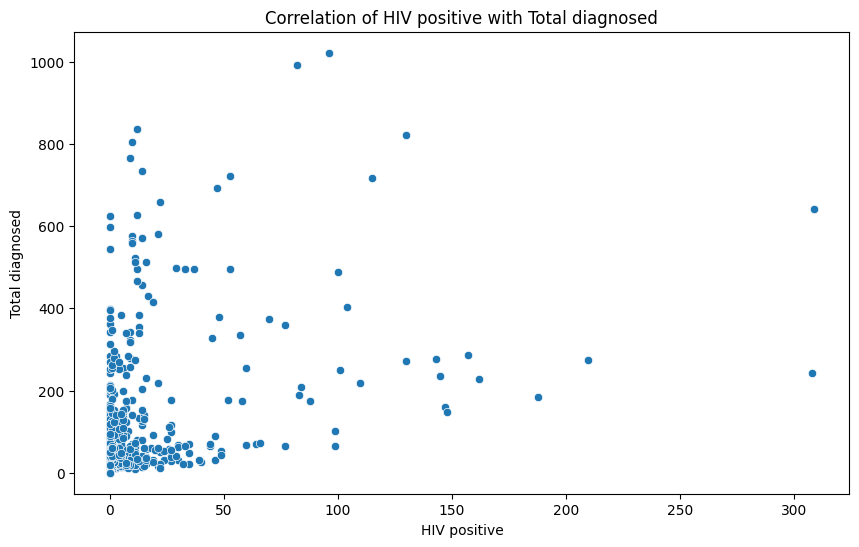

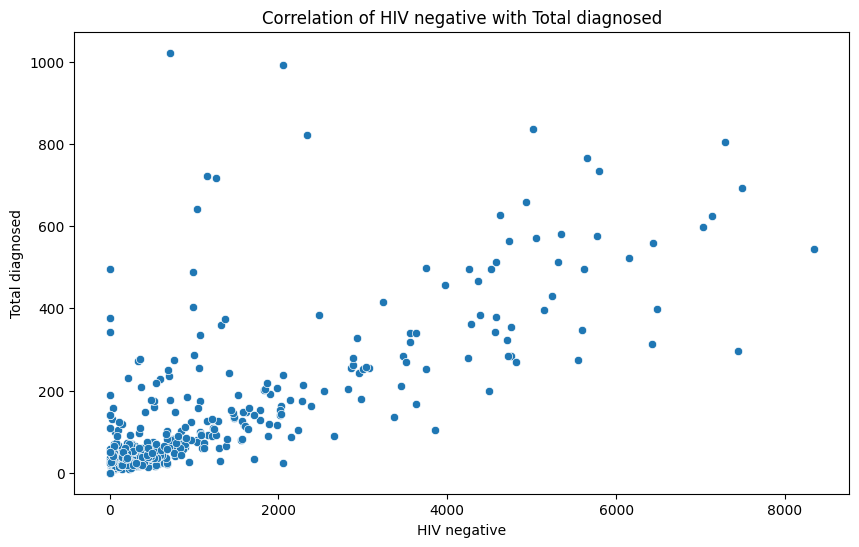

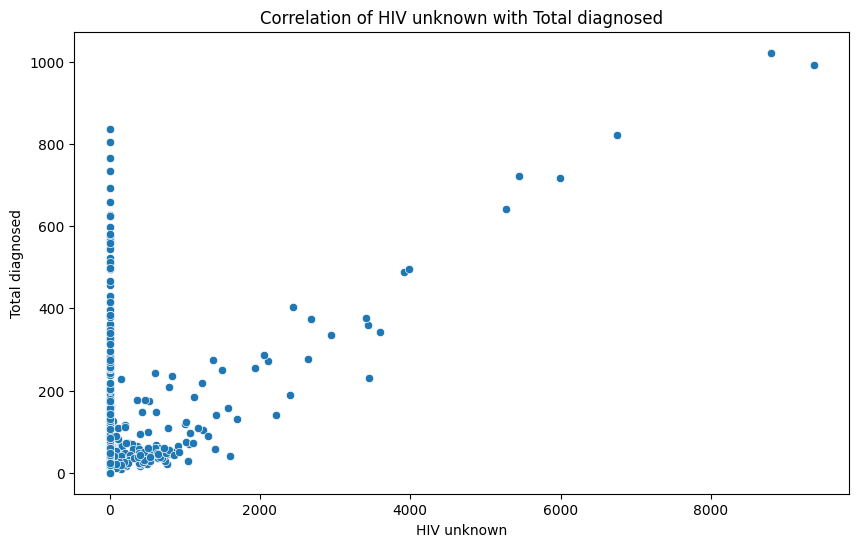

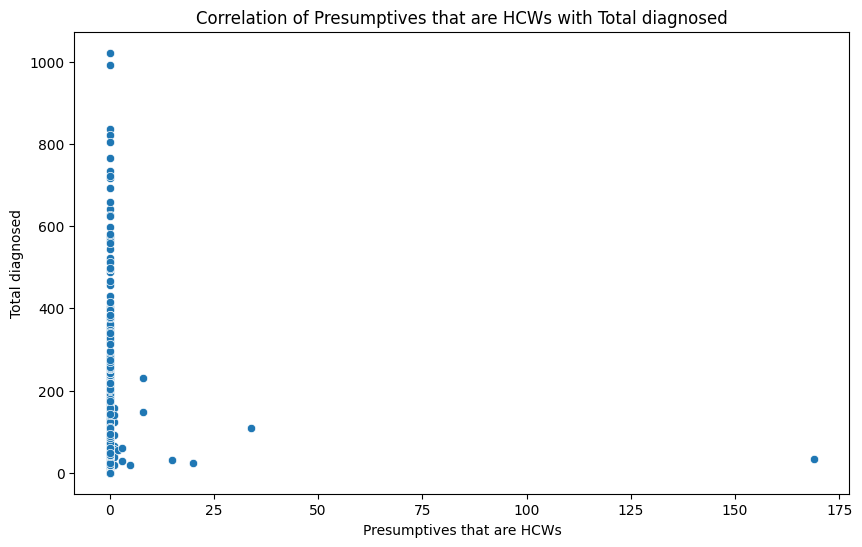

In [ ]:
for col in columns_for_correlation:
  scatter_plot(col)

##Data preprocessing

1] Apply one hot encoding on LGA for categorisation

In [ ]:
# Now we have to drop one LGA from data to remove multicollinearity
# for this we are going to check which LGA has least count of total diagnosed cases
total_diagnosed_lga = df.groupby('LGA')['Total diagnosed'].sum()
total_diagnosed_lga.sort_values()

LGA
JABA             576
KUDAN            577
SANGA            579
IKARA            635
KAURA            648
LERE             772
SOBA             850
KUBAU            939
KAGARKO         1062
BIRNIN-GWARI    1169
MARKAFI         1349
ZANGO-KATAF     1357
KAJURU          1989
IGABI           2326
JEMA'A          2374
SABON-GARI      2551
CHIKUN          3478
KAURU           4102
KACHIA          4454
GIWA            4462
KADUNA SOUTH    5540
ZARIA           6836
KADUNA NORTH    8124
Name: Total diagnosed, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse= False)
# created an array using one hot encoder
one_hot_encoded = encoder.fit_transform(df[['LGA']])
# convert array to df
one_hot_df = pd.DataFrame(one_hot_encoded , columns = encoder.get_feature_names_out(['LGA']))

df = pd.concat([df , one_hot_df] , axis = 1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# check data after onehot encoding
df.head()

Year  Quarter           LGA  Total number of presumptives  \
0  2019        1  BIRNIN-GWARI                            58   
1  2019        1        CHIKUN                           346   
2  2019        1          GIWA                           201   
3  2019        1         IGABI                           261   
4  2019        1         IKARA                           209   

   Presumptive DS-TB  Presumptive DR-TB  Examined for diagnosis  \
0                 58                  0                      58   
1                306                 40                     322   
2                201                  0                     201   
3                251                 10                     261   
4                205                  4                     209   

   Total diagnosed  Rifampicin resistant  HIV positive  HIV negative  \
0               25                     0             2            56   
1               66                     0            99           222   
2               38                     1            16           185   
3               70                     3            10           251   
4               13                     0             5           204   

   HIV unknown  Presumptives that are HCWs  Year_Quarter  LGA_BIRNIN-GWARI  \
0            0                           0           0.0               1.0   
1           25                           0           0.0               0.0   
2            0                           0           0.0               0.0   
3            0                           0           0.0               0.0   
4            0                           0           0.0               0.0   

   LGA_CHIKUN  LGA_GIWA  LGA_IGABI  LGA_IKARA  LGA_JABA  LGA_JEMA'A  \
0         0.0       0.0        0.0        0.0       0.0         0.0   
1         1.0       0.0        0.0        0.0       0.0         0.0   
2         0.0       1.0        0.0        0.0       0.0         0.0   
3         0.0       0.0        1.0        0.0       0.0         0.0   
4         0.0       0.0        0.0        1.0       0.0         0.0   

   LGA_KACHIA  LGA_KADUNA NORTH  LGA_KADUNA SOUTH  LGA_KAGARKO  LGA_KAJURU  \
0         0.0               0.0               0.0          0.0         0.0   
1         0.0               0.0               0.0          0.0         0.0   
2         0.0               0.0               0.0          0.0         0.0   
3         0.0               0.0               0.0          0.0         0.0   
4         0.0               0.0               0.0          0.0         0.0   

   LGA_KAURA  LGA_KAURU  LGA_KUBAU  LGA_KUDAN  LGA_LERE  LGA_MARKAFI  \
0        0.0        0.0        0.0        0.0       0.0          0.0   
1        0.0        0.0        0.0        0.0       0.0          0.0   
2        0.0        0.0        0.0        0.0       0.0          0.0   
3        0.0        0.0        0.0        0.0       0.0          0.0   
4        0.0        0.0        0.0        0.0       0.0          0.0   

   LGA_SABON-GARI  LGA_SANGA  LGA_SOBA  LGA_ZANGO-KATAF  LGA_ZARIA  
0             0.0        0.0       0.0              0.0        0.0  
1             0.0        0.0       0.0              0.0        0.0  
2             0.0        0.0       0.0              0.0        0.0  
3             0.0        0.0       0.0              0.0        0.0  
4             0.0        0.0       0.0              0.0        0.0

as seen above as JABA has least count of Total diagnosed as 576 so we are going to remove it

In [ ]:
df.drop(columns = ['LGA','LGA_JABA','Year_Quarter'], inplace = True)

2] Chek outliers

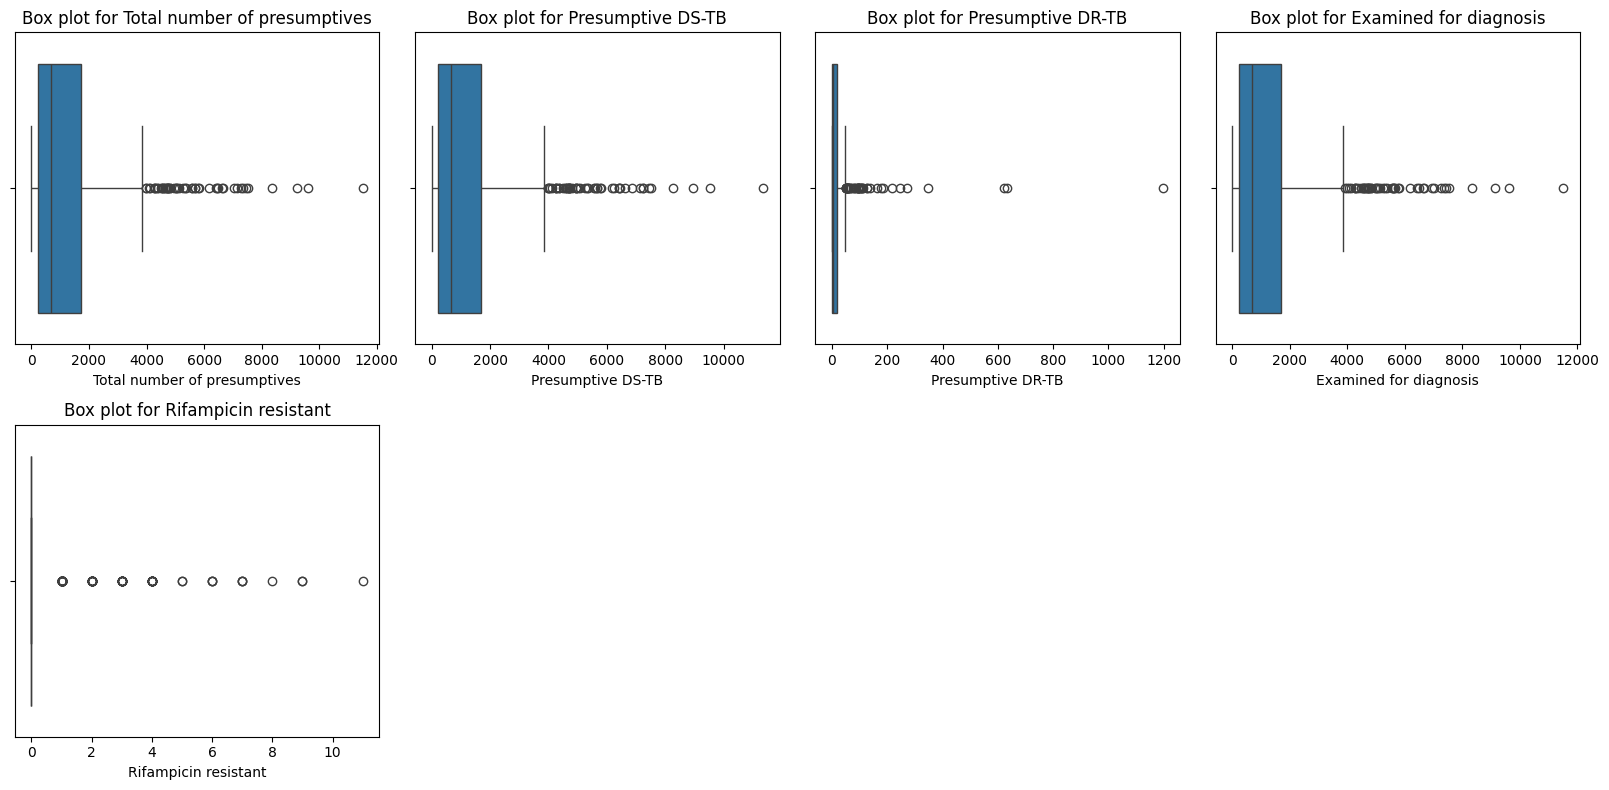

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
numeric_columns= ['Total number of presumptives' , 'Presumptive DS-TB' , 'Presumptive DR-TB','Examined for diagnosis','Rifampicin resistant']

# Create box plots for numeric columns
plt.figure(figsize=(16, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot for {col}')

plt.tight_layout()
plt.show()


In [ ]:
outliers_columns = ['Total number of presumptives' , 'Presumptive DS-TB' , 'Presumptive DR-TB','Examined for diagnosis','Rifampicin resistant']

In [ ]:
# as there are more outliers. but instead removing them we can transform them as data is very limited.
from scipy.stats.mstats import winsorize

for col in outliers_columns:
  df[col] = winsorize(df[col] , limits = [0.05,0.05])

In [ ]:
df.columns

Index(['Year', 'Quarter', 'Total number of presumptives', 'Presumptive DS-TB',
       'Presumptive DR-TB', 'Examined for diagnosis', 'Total diagnosed',
       'Rifampicin resistant', 'HIV positive', 'HIV negative', 'HIV unknown',
       'Presumptives that are HCWs', 'LGA_BIRNIN-GWARI', 'LGA_CHIKUN',
       'LGA_GIWA', 'LGA_IGABI', 'LGA_IKARA', 'LGA_JEMA'A', 'LGA_KACHIA',
       'LGA_KADUNA NORTH', 'LGA_KADUNA SOUTH', 'LGA_KAGARKO', 'LGA_KAJURU',
       'LGA_KAURA', 'LGA_KAURU', 'LGA_KUBAU', 'LGA_KUDAN', 'LGA_LERE',
       'LGA_MARKAFI', 'LGA_SABON-GARI', 'LGA_SANGA', 'LGA_SOBA',
       'LGA_ZANGO-KATAF', 'LGA_ZARIA'],
      dtype='object')

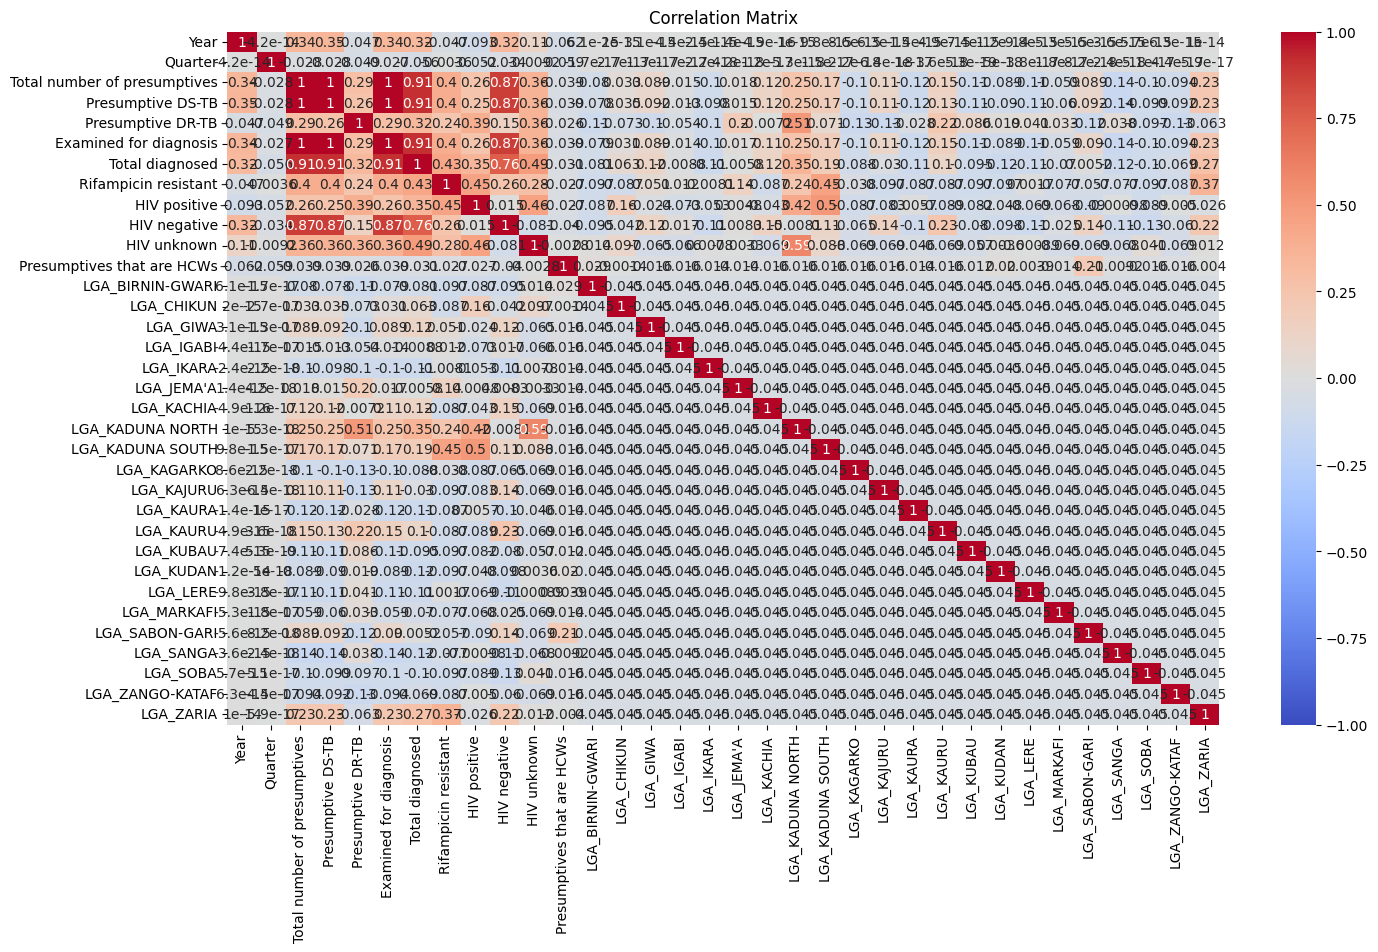

In [ ]:
# check multi collinearity for each feature
correlation_matrix = df.corr()
plt.figure(figsize=(16,9))
sns.heatmap(correlation_matrix , annot = True, cmap = 'coolwarm' , vmin = -1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Our data has some multicollinear features. So we have to solve them

###Preprocessing before model builtup

We are going to apply PCA on our data to reduce multicollinearity

In [ ]:
# Split the data
X = df.drop('Total diagnosed' , axis = 1)
y = df['Total diagnosed']

In [ ]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
pca = PCA()
pca.fit(X_scaled)

PCA()

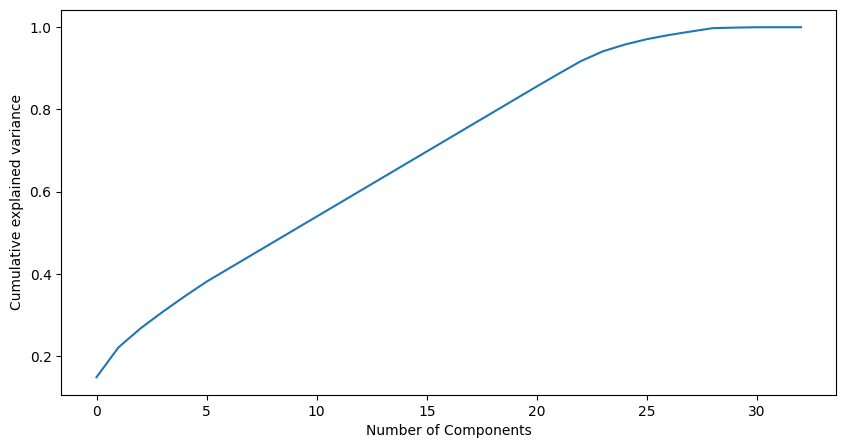

In [ ]:
# plot the variance of each component to get best number of components
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10,5))
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [ ]:
best_n_components = np.argmax(cumulative_variance_ratio >=0.95) + 1
best_n_components

25

In [ ]:
# we got number of components = 24 for pca
pca_model = PCA(n_components = best_n_components)
x_pca = pca_model.fit_transform(X_scaled)

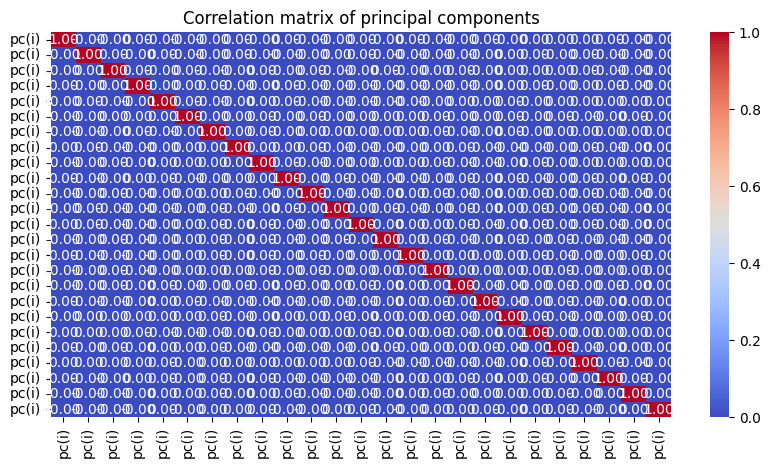

In [ ]:
pca_comp = pd.DataFrame(x_pca , columns = [f'pc(i)' for i in range(1 , x_pca.shape[1] + 1)])

correlation_matrix = pca_comp.corr()
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix , annot = True , cmap='coolwarm', fmt='.2f')
plt.title('Correlation matrix of principal components')
plt.show()

In [ ]:
# check multicolinearity
explained_var_ratio = pca_model.explained_variance_ratio_

eigen_values = pca_model.explained_variance_

In [ ]:
explained_var_ratio

array([0.14811145, 0.07278372, 0.04613257, 0.04000224, 0.03777959,
       0.03590849, 0.03172434, 0.03168246, 0.03168102, 0.03168044,
       0.03168044, 0.03168044, 0.03168044, 0.03168044, 0.03168044,
       0.03168044, 0.03168044, 0.03168044, 0.03168044, 0.03168044,
       0.03168044, 0.03109827, 0.03040849, 0.02389948, 0.01650352])

In [ ]:
eigen_values

array([4.89832629, 2.40709551, 1.52569147, 1.32294989, 1.24944267,
       1.18756188, 1.04918415, 1.04779885, 1.04775129, 1.04773222,
       1.04773222, 1.04773222, 1.04773222, 1.04773222, 1.04773222,
       1.04773222, 1.04773222, 1.04773222, 1.04773222, 1.04773222,
       1.04773222, 1.02847885, 1.00566629, 0.79040099, 0.5458027 ])

In [ ]:
# shape after PCA
x_pca.shape

(460, 25)

##Model Building

Data augmentation -
As our data is limited so to solve this we are going to create some random variations in our data so our model will predicts as accurate as well to unseen data

In [ ]:
# data augmentation using feature scaling variations
scaling_factors = np.random.uniform(0.9,1.1 ,x_pca.shape[1])
x_pca = x_pca * scaling_factors

###Model builtup

In [ ]:
!pip install catboost

In [ ]:
# get important libraries

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor , GradientBoostingRegressor , RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_absolute_error  ,mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [ ]:
# Train test split the data
x_train , x_test , y_train , y_test = train_test_split(x_pca , y , test_size = 0.2 , random_state = 42)

### check multiple models

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


def model_fitting(model_dict, x_train, y_train, x_test, y_test):
    best_models = {}
    best_params_dict = {}
    best_mse = np.inf  # Change to positive infinity

    for model_name, (model, param_grid) in model_dict.items():
        print(f'{model_name}:\n')
        grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
        grid_search.fit(x_train, y_train)

        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_

        best_model.fit(x_train, y_train)

        y_train_pred = best_model.predict(x_train)
        mse = mean_squared_error(y_train , y_train_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_train , y_train_pred)



        y_pred = best_model.predict(x_test)
        mset = mean_squared_error(y_test, y_pred)
        rmset = np.sqrt(mset)
        r2t = r2_score(y_test, y_pred)

        print('Best params:', best_params)
        print('RMSE train',rmse)
        print('RMSE test:', rmset)
        print("R2 train", r2)
        print('R^2:', r2t)
        print()

        if mse < best_mse:
            best_mse = mse
            best_models[model_name] = best_model
            best_params_dict[model_name] = best_params

    return best_models, best_params_dict


We are going to use AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor, DecisionTreeRegressor , KNeighborsRegressor and SVR as this models are does well for less data

In [ ]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Dictionary of models with hyperparameter lists
models_with_params2 = {
    'AdaBoostRegressor': (AdaBoostRegressor(), {'n_estimators': [85, 100, 115, 150, 200], 'learning_rate': [0.01, 0.1, 0.115, 0.5, 0.6]}),
    'GradientBoostingRegressor': (GradientBoostingRegressor(), {'n_estimators': [600, 750, 950], 'learning_rate': [0.1, 0.2, 0.3, 0.5], 'max_depth': [2, 3]}),
    'RandomForestRegressor': (RandomForestRegressor(), {'n_estimators': [50, 75, 100, 150], 'max_depth': [5, 7]}),
    'DecisionTreeRegressor': (DecisionTreeRegressor(), {'max_depth': [1, 2, 3, 5, 7]}),
    'SVR': (SVR(), {'C': [1, 10, 11, 12, 14], 'kernel': ['linear', 'rbf']}),
    'KNeighborsRegressor': (KNeighborsRegressor(), {'n_neighbors': [2, 3, 4, 5]}),
    'XGBRegressor': (XGBRegressor(), {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.05, 0.1], 'max_depth': [3, 5, 7], 'subsample': [0.8, 0.9, 1.0]}),
    'ExtraTreesRegressor': (ExtraTreesRegressor(), {'n_estimators': [50, 100, 150], 'max_depth': [None, 5, 10]})
}




In [ ]:
best_model , best_param = model_fitting(models_with_params2 ,x_train , y_train, x_test , y_test )

Streaming output truncated to the last 5000 lines.
8:	learn: 135.2899938	total: 110ms	remaining: 12.1s
9:	learn: 131.7864206	total: 122ms	remaining: 12.1s
10:	learn: 127.1560645	total: 134ms	remaining: 12.1s
11:	learn: 123.3244103	total: 146ms	remaining: 12s
12:	learn: 118.7709699	total: 158ms	remaining: 12s
13:	learn: 114.4676745	total: 170ms	remaining: 12s
14:	learn: 111.5653490	total: 183ms	remaining: 12s
15:	learn: 107.7062077	total: 197ms	remaining: 12.1s
16:	learn: 103.7482169	total: 209ms	remaining: 12.1s
17:	learn: 101.0698603	total: 222ms	remaining: 12.1s
18:	learn: 97.9626101	total: 234ms	remaining: 12.1s
19:	learn: 94.7423732	total: 246ms	remaining: 12s
20:	learn: 91.8011465	total: 258ms	remaining: 12s
21:	learn: 89.4069203	total: 271ms	remaining: 12s
22:	learn: 85.8031341	total: 286ms	remaining: 12.1s
23:	learn: 82.7057058	total: 302ms	remaining: 12.3s
24:	learn: 80.6578662	total: 314ms	remaining: 12.2s
25:	learn: 78.9553192	total: 329ms	remaining: 12.3s
26:	learn: 77.23652

###Best Final Model

In [ ]:
AdaBoostRegressor_model = AdaBoostRegressor(learning_rate=0.115 ,n_estimators = 115)

In [ ]:
# Fit the best model
AdaBoostRegressor_model.fit(x_train , y_train)

In [ ]:
# check balanced fit or not by cheking diff betn test rmse and train rmse
y_train_pred = AdaBoostRegressor_model.predict(x_train)
mse_train = mean_squared_error(y_train , y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train , y_train_pred)

In [ ]:
y_pred = AdaBoostRegressor_model.predict(x_test)


In [ ]:
mse = mean_squared_error(y_test , y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test , y_pred)

In [ ]:
print('Train data RMSE: ',rmse_train)
print('Test data RMSE: ',rmse)
print('Train data r2 score: ',r2_train)
print('Test data r2 score: ',r2)

The above differences betn (rmse of train and test data) and r2 scores are less shows that the model is more balanced fit for both train and test data.

###Plots To Get More Important Features only

In [ ]:
# get most important features
# im using random forest regressor for only get important features as gradient decent regressor doesnt gives
x_train , x_test ,y_train ,  y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model = RandomForestRegressor()
model.fit(x_train , y_train)

In [ ]:
pip install shap

In [ ]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer.shap_values(x_test)

# Summary plot
shap.summary_plot(shap_values, x_test)


##PIKL Files for deployment

* 1] As per above all i used standard scaler to scale the models
* 2] used winsorize to process outliers instead removing them
* 3] used PCA to treat multicolinearity
* 4] As Model performed well on train and Test data and more precie to balance, it will well precisely predicts our input data

In [ ]:
import joblib
# 1] winsorize used for outliers removal
winsorize_info = {'limits': [0.05, 0.05]}
joblib.dump(winsorize_info, path+'winsorize_info.pkl')

['/content/drive/MyDrive/Omdena/My Contribution/Model/winsorize_info.pkl']

In [ ]:

# load the file in your deployment


# import joblib

# # Load the winsorizing information
# winsorize_info = joblib.load('winsorize_info.pkl')

# from scipy.stats.mstats import winsorize

# # x_new will be the input data while deployment
# winsorized_data_new, _ = winsorize(X_new, limits=winsorize_info['limits'])


In [ ]:
# 2] standard scaler transform pikl

joblib.dump(scaler, path+'scaler.joblib')

# Load the scaler object
loaded_scaler = joblib.load(path+'scaler.joblib')

# Apply the loaded scaler to new data
X_new_scaled = loaded_scaler.transform(X)

In [ ]:
# 3] PCA pikl
# Save the PCA model
joblib.dump(pca_model, path+'pca_model.joblib')

# Load the PCA model from the file
loaded_pca_model = joblib.load(path+'pca_model.joblib')

# Transform new data using the loaded PCA model
X_new_pca = loaded_pca_model.transform(X)

X has feature names, but PCA was fitted without feature names


In [ ]:
# 3] Save the Gradient Boost model
joblib.dump(AdaBoostRegressor_model, path+'AdaBoostRegressor_model.joblib')

['/content/drive/MyDrive/Omdena/My Contribution/Model/AdaBoostRegressor_model.joblib']

###Process done-

##Conclusion-

* As per the data and plots the Presumptive DS TB , Total number of presumptives ,Examined for diagnosis and HIV positive are more important features
* Patients with Higher Rifampcin resistance having less chances to TB infection